# TRỰC QUAN HÓA DỮ LIỆU - ĐỒ ÁN CUỐI KỲ
________

**Nhóm thực hiện:**  Nhóm 12

**Các thành viên trong nhóm:** 

| MSSV | Họ và tên
|:-:|:-:
| 18120258 | Trần Thanh Tùng
| 18120288 | Trần Hữu Chí Bảo
| 18120293 | Vòng Cảnh Chi
| 18120296 | Cao Tất Cường
| 18120339 | Hà Văn Duy

______

# Trực quan hóa dữ liệu nông - lâm - ngư nghiệp Việt Nam

In [ ]:
!wget -qO- https://drive.google.com/uc?id=1vV2YjoZhOW3Y5WHqzBDY-tTNfBxnWMSI > data.zip
!unzip -o data.zip >> /dev/null 

# Import thư viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Chuẩn bị dữ liệu

In [ ]:
df_path = []
for name_file in glob.glob("Data_agri" + "/*.csv"):
  df_path.append(name_file)
if df_path[0] != 'Data_agri/DT_khoai.csv':
   ten_file = df_path[0]
   a = df_path.index('Data_agri/DT_khoai.csv')
   df_path[0] = 'Data_agri/DT_khoai.csv'
   df_path[a] = ten_file

In [ ]:
temp = 0
data_df = pd.DataFrame()
for name_file in df_path:
  df = pd.read_csv(name_file,header=1)
  df = df.set_index('Tỉnh, thành phố')
  df = df.unstack().reset_index(name=name_file[10:-4])
  if temp == 0:
    data_df = df.copy()
    temp += 1
  else:
    temp += 1
    data_df = pd.merge(left=data_df, right=df, on=['level_0','Tỉnh, thành phố'], how='left')
data_df.rename(columns={'level_0':'Năm'}, inplace=True)

In [ ]:
data_df.head()

,Năm,"Tỉnh, thành phố",DT_khoai,SL_khoai,DT_thuysan,SL_ngo,SL_thuysan,DT_rung_trongmoi,SL_trau,SL_thuysan_nuoitrong,DT_rung,DT_ngo,SL_lua,SL_thuysan_khaithac,SL_gia_cam_2000_2019,SL_go,DT_lua,SL_heo,SL_bo,SL_san,DT_san
0,1995,CẢ NƯỚC,304.6,1685.8,453.6,1177.2,1584361.0,209.6,2962.8,389069.0,209.6,556.8,24963.7,1195292.0,NaN,2793.1,6765.6,16306.4,3638.9,2211.5,277.4
1,1995,Đồng bằng sông Hồng,79.9,566.8,67.0,255.4,125731.0,17.8,349.6,55628.0,17.8,98.2,5207.1,70103.0,NaN,291.8,1238.1,4516.8,452.1,NaN,NaN
2,1995,Hà Nội,4.8,29.7,2.6,21.8,6940.0,0.3,18.7,4985.0,0.3,9.6,177.1,1955.0,NaN,8.5,56.1,271.6,35.8,1.8,0.3
3,1995,Hà Tây,12.9,90.1,8.1,51.3,13402.0,1.0,47.2,6450.0,1.0,17.6,647.2,6952.0,NaN,9.4,168.2,680.0,95.7,NaN,NaN
4,1995,Vĩnh Phúc,8.0,47.3,1.9,38.5,6805.0,1.4,35.7,3810.0,1.4,16.2,217.2,2995.0,NaN,69.2,72.1,347.1,92.3,NaN,NaN


In [ ]:
data_df.tail()

,Năm,"Tỉnh, thành phố",DT_khoai,SL_khoai,DT_thuysan,SL_ngo,SL_thuysan,DT_rung_trongmoi,SL_trau,SL_thuysan_nuoitrong,DT_rung,DT_ngo,SL_lua,SL_thuysan_khaithac,SL_gia_cam_2000_2019,SL_go,DT_lua,SL_heo,SL_bo,SL_san,DT_san
1770,Sơ bộ 2019,Cần Thơ,..,..,7.1,5.0,230380.0,..,0.1,223830.0,..,0.9,1365.9,6550.0,2003.0,4.1,225.1,96.4,4.2,NaN,NaN
1771,Sơ bộ 2019,Hậu Giang,0.1,1.4,7.8,19.0,70492.0,0.4,1.5,67823.0,0.4,3.2,1258.4,2669.0,4429.0,13.9,196.1,86.1,3.6,NaN,NaN
1772,Sơ bộ 2019,Sóc Trăng,1.5,19.3,78.9,17.0,297571.0,0.9,2.4,233419.0,0.9,4.3,2170.2,64152.0,6607.0,95.3,356.2,99.8,38.8,NaN,NaN
1773,Sơ bộ 2019,Bạc Liêu,0.5,3.5,140.5,1.0,358860.0,..,1.2,241860.0,..,0.2,1143.1,117000.0,2942.0,4.2,189.2,97.7,2.5,NaN,NaN
1774,Sơ bộ 2019,Cà Mau,0.2,0.9,305.0,2.9,554650.0,3.6,0.2,337650.0,3.6,0.6,525.4,217000.0,3015.0,230.6,115.6,71.7,0.4,NaN,NaN


# Khám phá và tiền xử lý dữ liệu

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [ ]:
data_df.shape

(1775, 21)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng mang thông tin về nông-lâm-ngư nghiệp của một tình thành trong 1 năm
- Có vẻ không có dòng nào có ý nghĩa khác so với các dòng còn lại.

## Dữ liệu có các dòng bị lặp không?

In [ ]:
data_df.duplicated().sum()

0

Dữ liệu không có các dòng bị lặp.

## Mỗi cột hiện đang có kiểu dữ liệu gì?

In [ ]:
data_df.dtypes

Năm                     object
Tỉnh, thành phố         object
DT_khoai                object
SL_khoai                object
DT_thuysan              object
SL_ngo                  object
SL_thuysan              object
DT_rung_trongmoi        object
SL_trau                 object
SL_thuysan_nuoitrong    object
DT_rung                 object
DT_ngo                  object
SL_lua                  object
SL_thuysan_khaithac     object
SL_gia_cam_2000_2019    object
SL_go                   object
DT_lua                  object
SL_heo                  object
SL_bo                   object
SL_san                  object
DT_san                  object
dtype: object

Phân thành chân nuôi (gia súc (bò, trâu, heo), gia cầm)

Phân thành nông nghiệp (lúa, ngô, khoai, sắn)

Phân thành lâm nghiệp (rừng)

Phân thành ngư nghiệp (đánh bắt thủy hải sản).

### Kiểm tra kiểu dữ liệu thực sự của đối tượng object

In [ ]:
def open_object_dtype(s):
    dtypes = set(s.apply(lambda x: type(x)).unique().tolist())
    return dtypes

In [ ]:
object_df = data_df.select_dtypes(include = 'object').columns
data = object_df.map(lambda x: open_object_dtype(data_df[x]))
pd.Series(data, index = object_df)

Năm                                      {<class 'str'>}
Tỉnh, thành phố                          {<class 'str'>}
DT_khoai                {<class 'str'>, <class 'float'>}
SL_khoai                {<class 'str'>, <class 'float'>}
DT_thuysan              {<class 'str'>, <class 'float'>}
SL_ngo                  {<class 'str'>, <class 'float'>}
SL_thuysan              {<class 'str'>, <class 'float'>}
DT_rung_trongmoi        {<class 'str'>, <class 'float'>}
SL_trau                 {<class 'str'>, <class 'float'>}
SL_thuysan_nuoitrong    {<class 'str'>, <class 'float'>}
DT_rung                 {<class 'str'>, <class 'float'>}
DT_ngo                  {<class 'str'>, <class 'float'>}
SL_lua                  {<class 'str'>, <class 'float'>}
SL_thuysan_khaithac     {<class 'str'>, <class 'float'>}
SL_gia_cam_2000_2019    {<class 'str'>, <class 'float'>}
SL_go                   {<class 'str'>, <class 'float'>}
DT_lua                  {<class 'str'>, <class 'float'>}
SL_heo                  {<class

In [ ]:
data_df.rename(columns={'SL_gia_cam_2000_2019':'SL_gia_cam'},inplace = True)

## Đổi kiểu dữ liệu

Trước khi ép kiểu dữ liệu, ta thấy trong dữ liệu có giá trị `..` ta coi đó là giá trị thiếu nên cần replace về NaN

In [ ]:
data_df.replace('..', np.nan, inplace=True)
data_df.replace('Sơ bộ 2019', '2019', inplace=True)

In [ ]:
data_df['Năm'] = data_df['Năm'].astype('int')
data_df = data_df[data_df['Năm'].isin(list(map(str,range(2000,2020))))].reset_index(drop=True)

In [ ]:
data_df[data_df.columns[2:]] = data_df[data_df.columns[2:]].apply(pd.to_numeric, axis=1)

## Phạm vi, giá trị trung bình và độ lệch chuẩn của từng thuộc tính là gì?

In [ ]:
numeric_df = data_df.select_dtypes(exclude='object')
numeric_df.describe()

,Năm,DT_khoai,SL_khoai,DT_thuysan,SL_ngo,SL_thuysan,DT_rung_trongmoi,SL_trau,SL_thuysan_nuoitrong,DT_rung,DT_ngo,SL_lua,SL_thuysan_khaithac,SL_gia_cam,SL_go,DT_lua,SL_heo,SL_bo,SL_san,DT_san
count,1420.000000,1386.000000,1386.000000,1379.000000,1392.000000,1.379000e+03,1232.000000,1396.000000,1.379000e+03,1232.000000,1391.000000,1396.000000,1.379000e+03,1396.000000,1378.000000,1396.000000,1396.000000,1394.000000,825.000000,808.000000
mean,2009.500000,7.180952,61.770996,42.934010,181.548491,2.164719e+05,10.719237,117.107880,1.082647e+05,10.719237,44.856650,1695.027292,1.082062e+05,12604.731232,277.069956,324.934169,1111.722063,232.040674,387.550424,23.134282
std,5.768313,22.467366,186.169499,148.424699,560.161758,7.337108e+05,31.936613,377.045191,4.047949e+05,31.936613,136.776783,5343.426326,3.519721e+05,38112.212637,1100.588077,1010.899828,3260.077248,700.792919,1302.982422,74.522413
min,2000.000000,0.000000,0.000000,0.100000,0.000000,2.010000e+02,0.100000,0.100000,7.900000e+01,0.100000,0.000000,28.200000,5.000000e+00,78.000000,0.600000,5.100000,56.300000,0.100000,1.400000,0.100000
25%,2004.750000,0.500000,3.300000,2.000000,14.875000,6.966000e+03,0.700000,4.375000,4.194500e+03,0.700000,4.200000,200.150000,8.875000e+02,2267.750000,13.925000,45.200000,238.275000,28.525000,38.900000,3.900000
50%,2009.500000,1.700000,14.400000,5.800000,42.450000,4.170600e+04,3.450000,19.900000,1.391000e+04,3.450000,9.800000,404.450000,1.019800e+04,3948.000000,51.750000,78.800000,365.150000,67.050000,105.000000,7.600000
75%,2014.250000,4.400000,32.975000,14.000000,98.075000,1.355880e+05,7.600000,90.825000,5.354950e+04,7.600000,29.150000,1030.875000,6.592500e+04,7390.500000,146.575000,190.225000,589.200000,158.725000,296.000000,16.225000
max,2019.000000,254.300000,1703.700000,1147.700000,5287.200000,8.268192e+06,292.200000,2996.400000,4.490510e+06,292.200000,1179.000000,45091.000000,3.777682e+06,481079.000000,16314.000000,7902.500000,29075.300000,6724.700000,10909.900000,569.000000


## Tạo cột khu vực của tỉnh đó

In [ ]:
khu_vuc = ['CẢ NƯỚC', 'Đồng bằng sông Hồng', 'Trung du và miền núi phía Bắc', 'Bắc Trung Bộ và Duyên hải miền Trung','Tây Nguyên','Đông Nam Bộ', 'Đồng bằng sông Cửu Long']
df = data_df[data_df['Tỉnh, thành phố'].isin(khu_vuc)]

In [ ]:
def create_region(index1,index2,data_df):
  name_province = data_df.iloc[index1+1:index2]['Tỉnh, thành phố'].values.tolist()
  return dict([[data_df.iloc[index1]['Tỉnh, thành phố'],name_province]])

In [ ]:
def create_dataframe_region(a):
  df1 = pd.DataFrame(a).T
  df1 = df1.unstack().to_frame().reset_index().drop(columns='level_0',axis=1)
  df1.columns =['khu vực','Tỉnh, thành phố']
  return df1

In [ ]:
x = df.iloc[1:len(khu_vuc)+1].index
region_df = pd.DataFrame()
for i in range(len(x)-1):
  t = create_region(x[i],x[i+1],data_df)
  df1 = create_dataframe_region(t)
  region_df = pd.concat([region_df,df1],axis=0)
region_df = region_df.reset_index(drop=True)
region_df.sample(5)

,khu vực,"Tỉnh, thành phố"
31,Bắc Trung Bộ và Duyên hải miền Trung,Thừa Thiên Huế
1,Đồng bằng sông Hồng,Hà Tây
48,Đông Nam Bộ,Đồng Nai
35,Bắc Trung Bộ và Duyên hải miền Trung,Bình Định
51,Đồng bằng sông Cửu Long,Long An


In [ ]:
data_df = data_df.merge(region_df,how='left',right_on='Tỉnh, thành phố',left_on='Tỉnh, thành phố' )
data_df.drop(index=df.index,axis=0,inplace =True)

In [ ]:
data_df.shape

(1280, 22)

## Kiểm tra tỉnh thành ở Việt Nam

In [ ]:
region_df['Tỉnh, thành phố'].unique()

array(['Hà Nội', 'Hà Tây', 'Vĩnh Phúc', 'Bắc Ninh', 'Quảng Ninh',
       'Hải Dương', 'Hải Phòng', 'Hưng Yên', 'Thái Bình', 'Hà Nam',
       'Nam Định', 'Ninh Bình', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn',
       'Tuyên Quang', 'Lào Cai', 'Yên Bái', 'Thái Nguyên', 'Lạng Sơn',
       'Bắc Giang', 'Phú Thọ', 'Điện Biên', 'Lai Châu', 'Sơn La',
       'Hoà Bình', 'Thanh Hoá', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình',
       'Quảng Trị', 'Thừa Thiên Huế', 'Đà Nẵng', 'Quảng Nam',
       'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hoà', 'Ninh Thuận',
       'Bình Thuận', 'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông',
       'Lâm Đồng', 'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai',
       'Bà Rịa - Vũng Tàu', 'TP.Hồ Chí Minh', 'Long An', 'Tiền Giang',
       'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp', 'An Giang',
       'Kiên Giang', 'Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu',
       'Cà Mau'], dtype=object)

In [ ]:
remove_tinh = ['Hà Tây']
region_df = region_df[~(region_df['Tỉnh, thành phố'].isin(remove_tinh))].reset_index(drop=True)
data_df = data_df[~(data_df['Tỉnh, thành phố'].isin(remove_tinh))].reset_index(drop=True)

In [ ]:
data_df['Tỉnh, thành phố'].nunique()

63

- Đã phù hợp với số lượng tỉnh, thành phố ở nước ta

## Số lượng tỉnh thành của mỗi khu vực

In [ ]:
sl_tinh = region_df.groupby('khu vực').agg({'Tỉnh, thành phố':'count'}).rename(columns={'Tỉnh, thành phố': 'Số lượng tỉnh, thành phố'})
sl_tinh

,"Số lượng tỉnh, thành phố"
khu vực,
Bắc Trung Bộ và Duyên hải miền Trung,14
Trung du và miền núi phía Bắc,14
Tây Nguyên,5
Đông Nam Bộ,6
Đồng bằng sông Cửu Long,13
Đồng bằng sông Hồng,11


**Nhận xét:**
- Số lượng tỉnh, thành phố ở 4 khu vực Trung du và miền núi phía Bắc, Đồng bằng sông Cửu Long, Đồng bằng sông Hồng, Bắc Trung Bộ và Duyên hải miền Trung tương đối đồng đều và bằng nhau.
- riêng khu vực Tây Nguyên và Đông Nam bộ có số lượng tỉnh, thành phố khá ít.

# Phân tích nông nghiệp

### Lúa, ngô, khoai, sắn qua từng năm về sản lượng, diện tích 

In [ ]:
ca_nuoc_df = df[df['Tỉnh, thành phố'] == 'CẢ NƯỚC'].set_index('Năm')

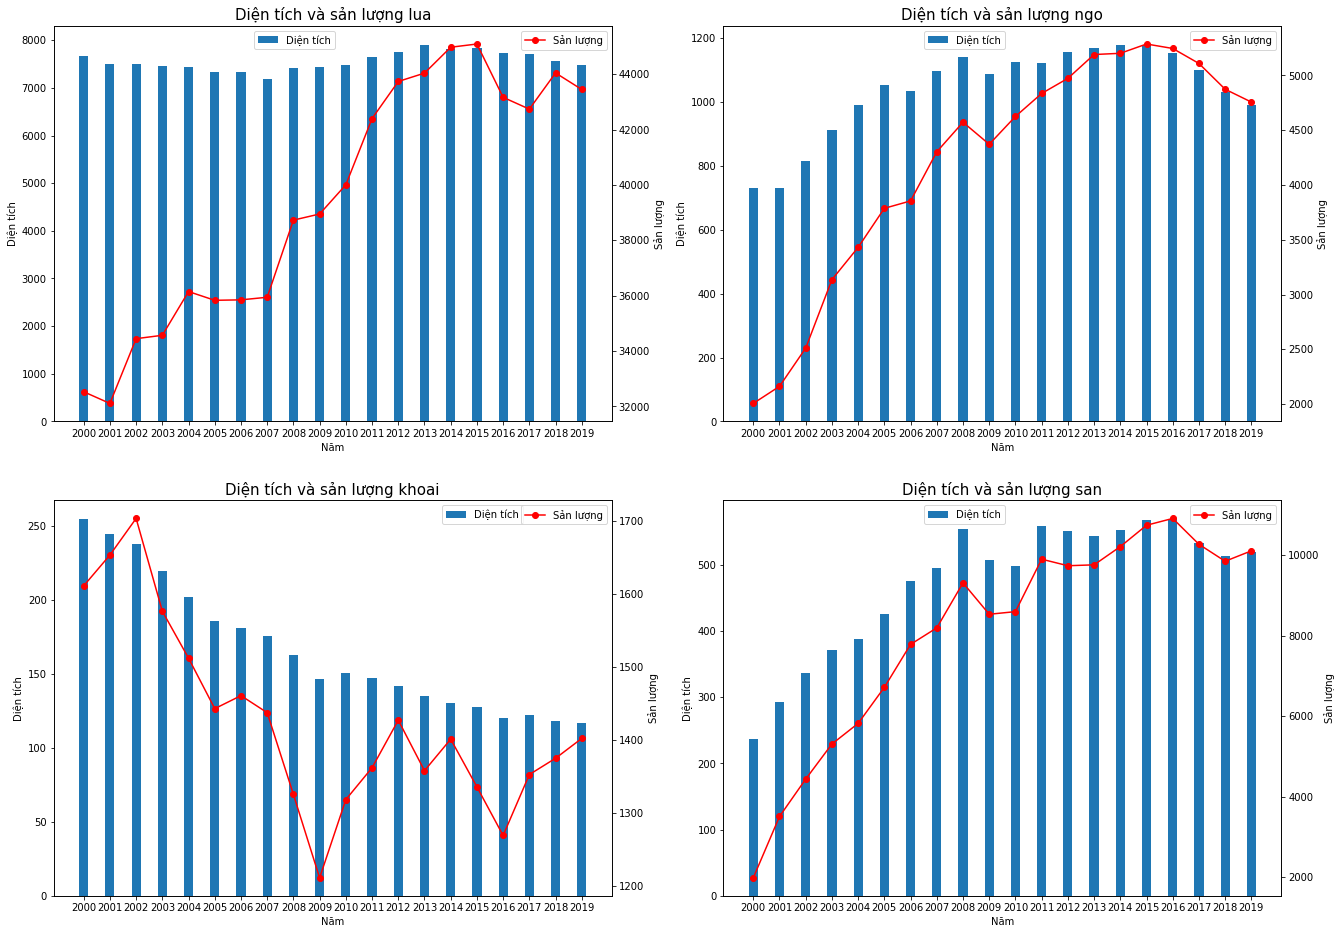

In [ ]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(22,16)
width = .35
count=0
agri = [('DT_lua','SL_lua'), ('DT_ngo','SL_ngo'),('DT_khoai','SL_khoai'),('DT_san','SL_san')]
for i in range(0,2):
  for j in range(0,2):
    width = .35
    ax[i][j].bar(ca_nuoc_df.index, ca_nuoc_df[agri[count][0]], width=width, label='Diện tích')
    ax[i][j].set_xticks(range(2000,2020))
    ax[i][j].set_xlabel('Năm')
    ax[i][j].set_ylabel('Diện tích')  
    ax[i][j].legend(bbox_to_anchor=(0.35, 0.5, 0.5, 0.5))
    ax[i][j].set_title(f"Diện tích và sản lượng {agri[count][0][3:]}",size=15)
    axes2 = ax[i][j].twinx()
    axes2.plot(ca_nuoc_df.index, ca_nuoc_df[agri[count][1]], color='r', marker='o', label='Sản lượng')
    axes2.set_ylabel('Sản lượng')
    axes2.legend(loc='best')
    count+=1
plt.show()

Từ các biểu đồ ta có thể thấy rằng:
- Diện tích lúa trồng ổn định đều qua các năm, tuy nhiên sản lượng lại tăng liên tục --> đây là minh chứng cho thấy việc tăng sự hiệu quả trong cách canh tác của nhân dân, đẩy mạnh năng suất cây trồng.
- Tương tự như lúa diện tích v

## So sánh sản lượng và diện tích của các loại cây nông nghiệp qua các năm




### Về diện tích

In [ ]:
name_dientich_agri = ['DT_lua','DT_ngo','DT_khoai','DT_san']
dientich_nong_nghiep_df = ca_nuoc_df.loc[:,name_dientich_agri]
dientich_nong_nghiep_df

,DT_lua,DT_ngo,DT_khoai,DT_san
Năm,,,,
2000,7666.3,730.2,254.3,237.6
2001,7492.7,729.5,244.6,292.3
2002,7504.3,816.0,237.7,337.0
2003,7452.2,912.7,219.6,371.9
2004,7445.3,991.1,201.8,388.6
2005,7329.2,1052.6,185.3,425.5
2006,7324.8,1033.1,181.2,475.2
2007,7192.5,1096.1,175.5,495.5
2008,7422.2,1140.2,162.6,554.0


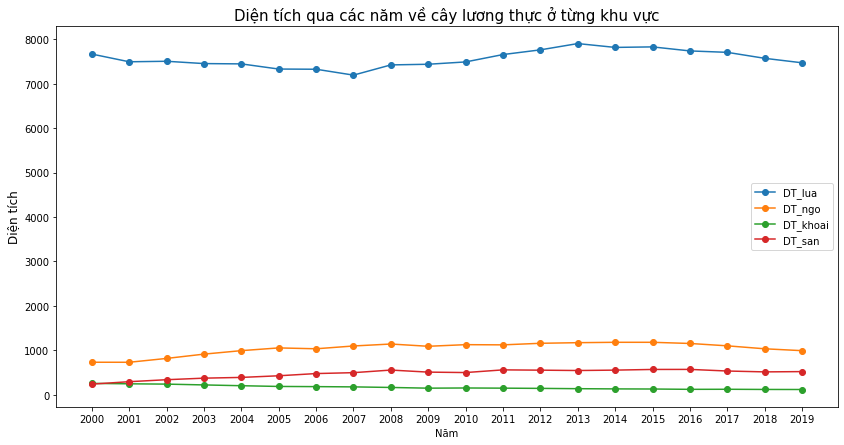

In [ ]:
dientich_nong_nghiep_df.plot.line(marker ='o',figsize=(14,7), legend=True)
plt.xticks(range(2000,2020))
plt.ylabel('Diện tích',size=12)
plt.title('Diện tích qua các năm về cây lương thực ở từng khu vực',size=15)
plt.show()

**Nhận xét:**
- Diện tích trông lúa của nước ta có sự tăng giảm trong từng giai đoạn khác nhau. Ở giai đoạn đầu tiên, là giai đoạn từ năm 2000-2006, diện tích lúa giảm và diện tích lúa thấp vào năm 2006 với khoảng 7000 ngìn ha. Nhưng sau đó là 1 giai đoạn tăng mạnh và đạt giá trị cao nhất vào năm 2013 với gần khoảng 8000 ha,đã tăng lên khoảng 1000 ha, và giai đoạn từ 2013 trở về sau thì bắt đầu có xu hướng giảm và đạt giá trị thấp nhất năm 2019 với sản lượng là khoảng 7400 ha.
- Ngoài diện tích trồng lúa có sự thay đổi trong từng giai đoạn thì diện tích trồng ngô và diện tích trồng khoai qua các năm đều tăng. Trong đó, diện tích trồng ngô đạt giá trị cao nhất vào năm 2016 với khoảng 1200ha, các năm về có giảm nhưng giảm không đáng kể. Còn đối với diện tích trồng sắn, đạt giá trị cao nhất vào năm 2019 với khoảng hơn 500 ngìn ha. 
- Diện tích trồng khoai vẫn còn thấp so với diện tích trồng lúa, ngô, sắn. Đã vậy Qua các năm thì diện trồng trồng khoai vẫn tiếp tục giảm và đạt giá trị  thấp nhất vào năm 2019 với diện tích khoảng 1000 ngìn ha.
 

 

### Về sản lượng

In [ ]:
name_sanluong_agri = ['SL_lua','SL_ngo','SL_khoai','SL_san']
sanluong_nong_nghiep_df = ca_nuoc_df.loc[:,name_sanluong_agri]
sanluong_nong_nghiep_df

,SL_lua,SL_ngo,SL_khoai,SL_san
Năm,,,,
2000,32529.5,2005.9,1611.3,1986.3
2001,32108.4,2161.7,1653.5,3509.2
2002,34447.2,2511.2,1703.7,4438.0
2003,34568.8,3136.3,1576.6,5308.9
2004,36148.9,3430.9,1512.3,5820.7
2005,35832.9,3787.1,1443.1,6716.2
2006,35849.5,3854.6,1460.9,7782.5
2007,35942.7,4303.2,1437.6,8192.8
2008,38729.8,4573.1,1325.6,9309.9


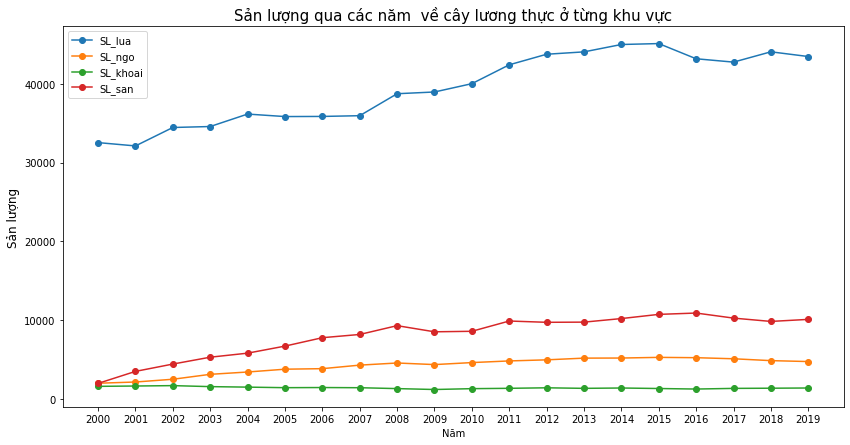

In [ ]:
sanluong_nong_nghiep_df.plot.line(marker ='o',figsize=(14,7), legend=True)
plt.xticks(range(2000,2020))
plt.ylabel('Sản lượng',size=12)
plt.title('Sản lượng qua các năm  về cây lương thực ở từng khu vực',size=15)
plt.show()

**Nhận xét:**
- Đối với hình bên phải, hình này thể hiện sản lượng của các loại cây lương thực trên cả nước.
- Dù diện tích lúa tăng, giảm trong từng giai đoạn khác nhau, nhưng sản lượng lúa qua các năm đều càng ngày càng tăng. Và đạt giá trị lớn nhất vào năm 2015 với khoảng 450000 ngìn tấn, các năm sau đó có sự tăng, giảm nhưng sự tăng, giảm đó không đáng kể.
- Nhìn thấy có sự thay đổi, đối với ngô và sắn, dù diện tích ngô lớn hơn hiện tích sắn nhưng sản lượng sắn lại lớn hơn sản lượng ngô. Cụ thể hơn, sản lượng ngô hàng năm đều có sự gia tăng khá lớn và đạt sản lượng cao nhất vào năm 2016 với hơn 10000 nghìn tấn. Còn đối vơi ngô, sản lượng ngô cũng có sự gia tăng nhưng tốc độ gia tăng sản lượng qua các năm  không lớn và đạt sản lượng cao nhất vào năm 2016 với hơn 5000 nhìn tấn. 
- Giải thích cho điều này, khi người dân bán ngô thì thu được lợi nhuận thấp hơn khi bán sắn. Hiện nay, khâu chọn giống ngô vẫn là điều đáng ngại nhất khi Việt Nam chưa chủ động được nguồn giống, nhất là các giống năng suất, chất lượng cao, chính điều này làm sản lượng sắn lớn hơn khá nhiều so với sản lượng ngô


## Tỉ trọng các loại cây lương thực ở nước ta.

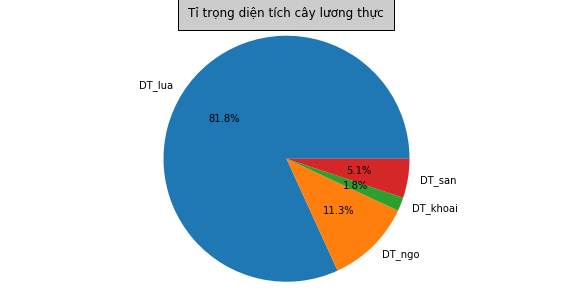

In [ ]:
mean_dientich = dientich_nong_nghiep_df.mean(axis=0)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
width = .35
values = mean_dientich
labels = mean_dientich.index
ax.pie(values,labels = labels, autopct = '%1.1f%%')
ax.set_title(f'Tỉ trọng diện tích cây lương thực',bbox={'facecolor':'0.8', 'pad':10})
ax.axis('equal')
plt.show()

**Nhận xét:**
- Diện tích lúa vẫn chiếm phần lớn diện tích trồng lương thực ở nước ta.
- Diện tích ngô xếp sau diện tích lúa.

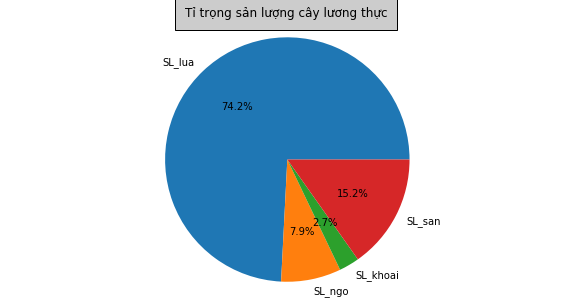

In [ ]:
mean_sanluong = sanluong_nong_nghiep_df.mean(axis=0)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
width = .35
values = mean_sanluong
labels = mean_sanluong.index
ax.pie(values,labels = labels, autopct = '%1.1f%%')
ax.set_title(f'Tỉ trọng sản lượng cây lương thực',bbox={'facecolor':'0.8', 'pad':10})
ax.axis('equal')
plt.show()

**Nhận xét:**
- Sản lượng lúa vẫn là lương thực chủ yếu của nước ta..
Ngoài ra, sắn cũng là lương thực tại một số tỉnh thành.

## Biểu diễn mỗi quan hệ giữa diện tích và sản lượng

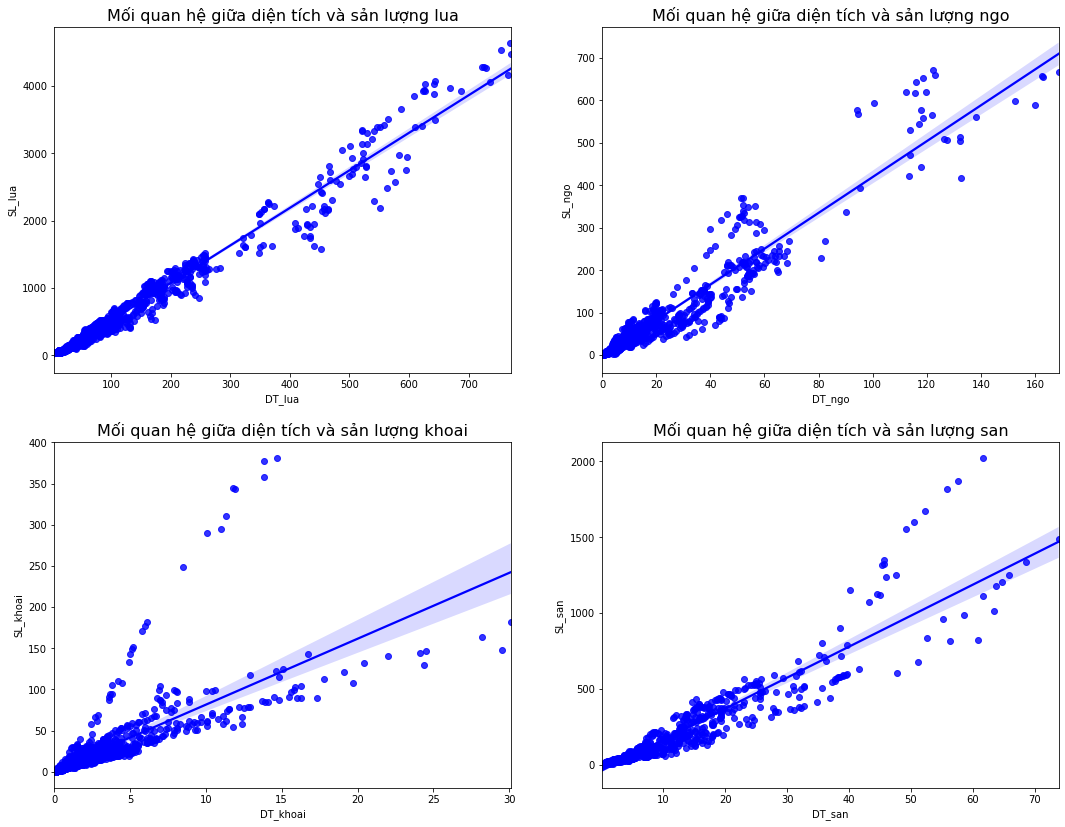

In [ ]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(18,14)
width = 0.5
count=0
agri = [('DT_lua','SL_lua'), ('DT_ngo','SL_ngo'),('DT_khoai','SL_khoai'),('DT_san','SL_san')]
for i in range(0,2):
  for j in range(0,2):
    sns.regplot(x=data_df[agri[count][0]],y=data_df[agri[count][1]], color = 'blue', ax = ax[i][j])
    ax[i][j].set_title(f'Mối quan hệ giữa diện tích và sản lượng {agri[count][0][3:]}',size=16)
    count+=1
plt.show()

**Nhận xét:**
- Khi diện tích của cây trồng tăng thì sản lượng cũng tăng theo.

### Phân tích số liệu giữa diện tích và sản lượng

#### Lúa

In [ ]:
lua_df = data_df[['DT_lua','SL_lua']].dropna()
Y = lua_df['SL_lua']
X = lua_df['DT_lua']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const    -44.218746
DT_lua     5.580859
dtype: float64

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 SL_lua   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 4.332e+04
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:27:00   Log-Likelihood:                -7822.4
No. Observations:                1248   AIC:                         1.565e+04
Df Residuals:                    1246   BIC:                         1.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.2187      4.841     -9.133      0.0

**Kết luận:**

- Biến DT_lua có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp tốt với dữ liệu quan sát về mặt thống kê.
- Biến DT_lua có thể giải thích được 97.2% sự thay đổi của biến SL_lua.
- Phương trình hồi quy:

          SL_lua = -44.2187 + 5.5809 × DT_lua
      
**Theo kết quả của mô hình:**
- Khi diện tích lúa tăng 1000 ha thì sản lượng lúa tăng 5580 tấn

#### Ngô

In [ ]:
ngo_df = data_df[['DT_ngo','SL_ngo']].dropna()
Y = ngo_df['SL_ngo']
X = ngo_df['DT_ngo']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const    -2.909396
DT_ngo    4.224523
dtype: float64

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 SL_ngo   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.367e+04
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:27:00   Log-Likelihood:                -5978.4
No. Observations:                1243   AIC:                         1.196e+04
Df Residuals:                    1241   BIC:                         1.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9094      1.035     -2.811      0.0

**Kết luận:**

- Biến DT_ngo có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp tốt với dữ liệu quan sát về mặt thống kê.
- Biến DT_ngo có thể giải thích được 91.7% sự thay đổi của biến SL_ngo.
- Phương trình hồi quy:

          SL_ngo = -2.9094 + 4.2245 × DT_ngo
      
**Theo kết quả của mô hình:**
- Khi diện tích ngô tăng 100 ha thì sản lượng ngô tăng 420 tấn.

#### Khoai

In [ ]:
khoai_df = data_df[['DT_khoai','SL_khoai']].dropna()
Y = khoai_df['SL_khoai']
X = khoai_df['DT_khoai']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               SL_khoai   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1673.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          5.10e-232
Time:                        14:27:00   Log-Likelihood:                -5719.2
No. Observations:                1238   AIC:                         1.144e+04
Df Residuals:                    1236   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5985      0.866      1.845      0.0

**Kết luận:**

- Biến DT_khoai có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0)
- Mô hình phù hợp tốt với dữ liệu quan sát về mặt thống kê.
- Biến DT_khoai có thể giải thích được 57.5% sự thay đổi của biến SL_khoai.
- Phương trình hồi quy:

          SL_khoai = 1.5985 + 8.0003 × DT_khoai
      
**Theo kết quả của mô hình:**
- Khi diện tích khoai tăng 100 ha thì sản lượng khoai tăng 800 tấn.

#### Sắn

In [ ]:
san_df = data_df[['DT_san','SL_san']].dropna()
Y = san_df['SL_san']
X = san_df['DT_san']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 SL_san   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     4999.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:27:00   Log-Likelihood:                -4733.4
No. Observations:                 788   AIC:                             9471.
Df Residuals:                     786   BIC:                             9480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.9813      4.863     -7.810      0.0

**Kết luận:**

- Biến DT_san có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0)
- Mô hình phù hợp tốt với dữ liệu quan sát về mặt thống kê.
- Biến DT_san có thể giải thích được 86.4% sự thay đổi của biến SL_san.
- Phương trình hồi quy:

          SL_san = -37.9813 + 20.4094 × DT_san
      
**Theo kết quả của mô hình:**
- Khi diện tích sắn tăng 100 ha thì sản lượng sắn tăng 2000 tấn.

## So sánh tỉ trọng trồng cây lương thực ở các khu vực trong năm 2000 và năm 2019

In [ ]:
nam_df = df[df['Năm'].isin([2000,2019])]

In [ ]:
nam_df[['Năm','Tỉnh, thành phố','DT_lua','DT_ngo','DT_khoai','DT_san']]

,Năm,"Tỉnh, thành phố",DT_lua,DT_ngo,DT_khoai,DT_san
0,2000,CẢ NƯỚC,7666.3,730.2,254.3,237.6
1,2000,Đồng bằng sông Hồng,1261.0,97.8,70.9,NaN
14,2000,Trung du và miền núi phía Bắc,638.7,282.5,49.0,NaN
29,2000,Bắc Trung Bộ và Duyên hải miền Trung,1244.6,144.1,111.3,NaN
44,2000,Tây Nguyên,176.8,86.8,9.3,NaN
50,2000,Đông Nam Bộ,399.4,100.0,3.9,NaN
57,2000,Đồng bằng sông Cửu Long,3945.8,19.0,9.9,NaN
1349,2019,CẢ NƯỚC,7470.1,990.8,116.5,519.3
1350,2019,Đồng bằng sông Hồng,1012.0,70.0,16.6,NaN
1363,2019,Trung du và miền núi phía Bắc,669.1,435.1,27.7,NaN


**Nhận xét:**
- Bởi vì thuộc tính `sắn` chỉ có số liệu về cả nước, không có số liệu về các khu vực nên sẽ xét thuộc tính này dựa vào dataframe `data_df`.
- Ta xử lý 2 thuộc tính DT_san và SL_san từ data_df và sau đó đưa vào df

### Xử lý cột SL_san và DT_san

In [ ]:
df = df.drop(columns =['DT_san','SL_san'],axis = 1)

In [ ]:
san_df = data_df.groupby(['Năm','khu vực'])['DT_san','SL_san'].sum().reset_index()
san_df.rename(columns={'khu vực':'Tỉnh, thành phố'}, inplace = True)
canuoc_san = san_df.groupby('Năm')['DT_san','SL_san'].sum().reset_index()
canuoc_san['Tỉnh, thành phố'] = 'CẢ NƯỚC'
san_df = pd.concat([san_df,canuoc_san],axis=0)

In [ ]:
df =df.merge(san_df,how='left',right_on=['Năm','Tỉnh, thành phố'], left_on=['Năm','Tỉnh, thành phố'])

### Biểu đồ so sánh các loại cây trồng nông nghiệp ở các khu vực

In [ ]:
nam_df = df[df['Năm'].isin([2000,2019])]

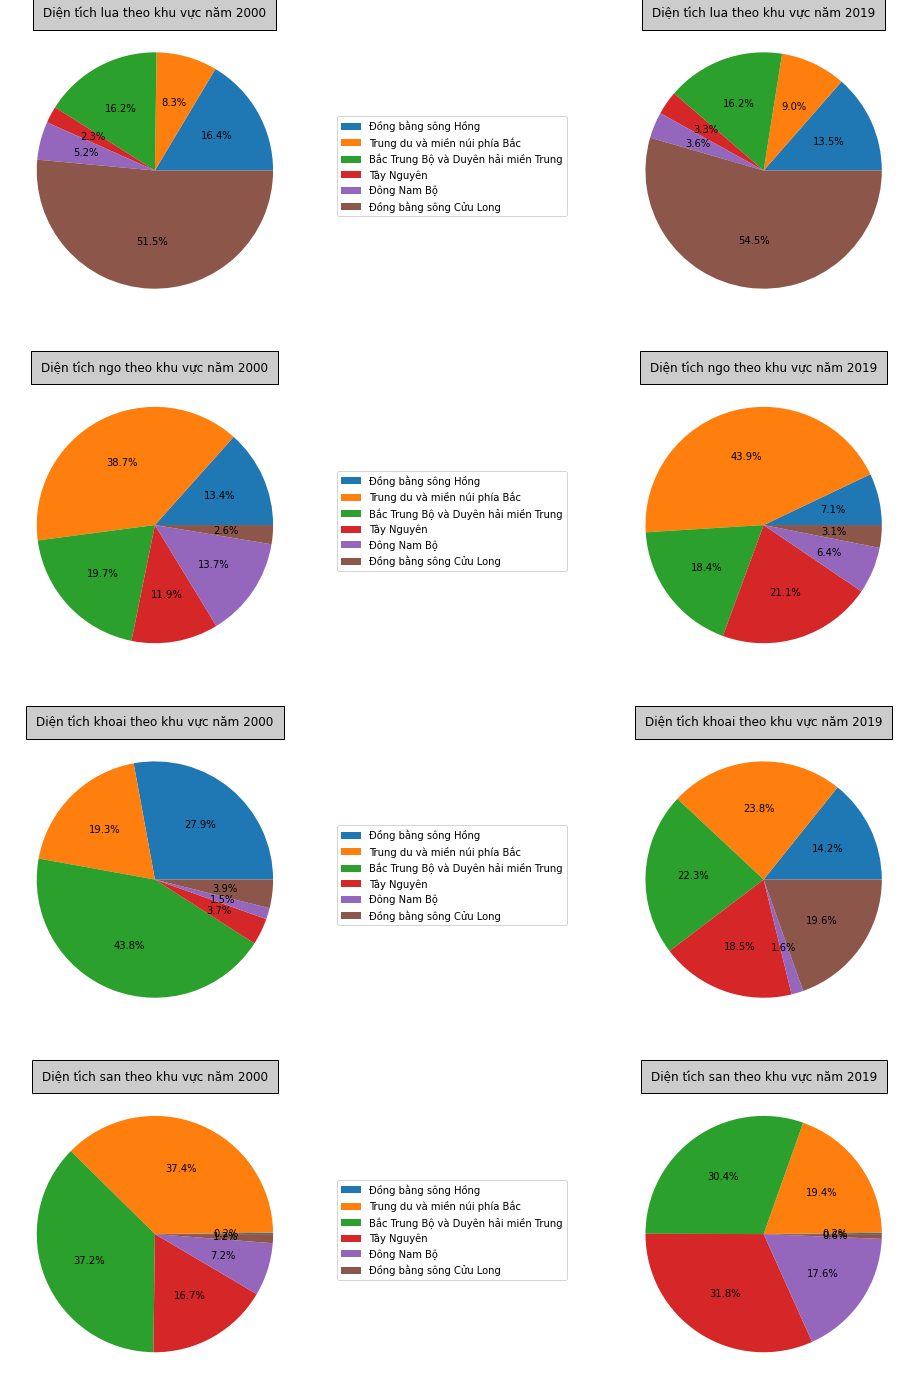

In [ ]:
fig, ax = plt.subplots(4,2)
fig.set_size_inches(20,25)
width = .35
count=0
labels = list(khu_vuc[1:])
agri = ['DT_lua','DT_ngo','DT_khoai','DT_san']
for i in range(0,4):
  values = nam_df[agri[count]][1:7]
  ax[i][0].pie(values,autopct = '%1.1f%%')
  ax[i][0].set_title(f'Diện tích {agri[count][3:]} theo khu vực năm 2000',bbox={'facecolor':'0.8', 'pad':10})
  ax[i][0].legend(labels, bbox_to_anchor=(1.1, 0.7))
  
  values = nam_df[agri[count]][8:]
  ax[i][1].pie(values, autopct = '%1.1f%%') 
  ax[i][1].set_title(f'Diện tích {agri[count][3:]} theo khu vực năm 2019', bbox={'facecolor':'0.8', 'pad':10})
  count+=1
plt.show()

**Nhận xét:**
1.   Thống kê mô tả
 - Đồng bằng sông Cửu Long là khu vực có tích lúa lớn nhất nước ta.
 Chiếm hơn 55% diện tích lúa của cả nước. Tiếp theo là các khu vực đồng bằng sông Hồng và Bắc Trung Bộ và duyên Hải miền Trung. 
 - Trung du và miền núi phía Bắc là khu vực có tích ngô lớn nhất nước ta.  Chiếm hơn 50% diện tích ngô của cả nước.Tiếp theo là các khu vực Tây Nguyên và Bắc Trung Bộ và duyên Hải miền Trung.
 - Bắc Trung Bộ và duyên Hải miền Trung là khu vực có diện tích khoai lớn nhất nước ta. Tiếp theo là các khu vực đồng bằng sông Hồng và trung du miền núi Phía Bắc.
 - Tây Nguyên và Bắc Trung Bộ và duyên Hải miền Trung là 2 khu vực có tích trồng sắn lớn nhất nước ta vào năm 2000 và chiếm phần lớn diện tích trồng sắn của cả nước.
2.   Phân tích dữ liệu đơn giản
 - Đồng bằng sông Cửu Long là khu vực có tích lúa lớn nhất nước ta.Chiếm hơn 50% diện tích lúa của cả nước. Tiếp theo là các khu vực đồng bằng sông Hồng và Bắc Trung Bộ và duyên Hải miền Trung. 
Nhìn chung, Diện tích lúa từ năm 2000 đến 2019 không có sự thay đổi đáng kể. Khu vực sông Cửu long vẫn làn khu vực có diện tích lúa lớn nhất (chiếm khoảng 51,5%) và có sự gia tăng khoảng 3% về diện tích lúa vào năm 2019 so với cả nước vào năm 2000. Còn các khu vực khác thì nhìn chung vẫn không có sự thay đổi đáng kể nào.

 - Diện tích ngô từ năm 2000 đến 2019 có sự thay đổi khá lớn ở khu vực trung du miền núi phía Bắc. Diện tích ngô ở khu vực này vào năm 2000 chiếm 38.7%  và có sự gia tăng khoảng 6% và chiếm khoảng khá lớn 43.9% về diện tích ngô vào năm 2019 so với cả nước.
 Các khu vực Đồng bằng Sông Hồng và Đông Nam bộ thì diện tích ngô năm 2019 giảm khoảng 6% so với năm 2000. Ngoài ra, khu vực tây nguyên là khu vực có diện tích ngô sư gia tăng đáng kể nhất đã gia tăng khoảng 10% và chiếm khoảng 21.1% diện tích ngô so với cả nước.

 - Diện tích khoai từ năm 2000 đến 2019 là loại thực phẩm có nhiều sự thay đổi nhất. Vào năm 2000 thì Bắc Trung bộ và duyên hải miền Trung là khu vực chiếm diện tích ngô lớn nhất (chiếm khoảng 43.8%). tuy nhiên, đến năm 2019 thì diện tích ngô của khu vực này so với các khu vực khác đã giảm đi rất nhiều (chỉ còn chiếm khoảng 22.3%) và không còn sự chênh lệch diện tích trồng khoai so với các khu vực khác  . Đặc biệt, khu vực đồng bằng sông cửu long và tây nguyên  là 2 khu vực chiếm diện tích ngô thấp nhất (chiếm khoảng 4%) so với cả nước năm 2000 . Nhưng đến năm 2019 thì diện tích ngô của khu vực này so với các khu vực khác đã tăng một cách đáng kể ( lần lượt chiếm khoảng 22.3% và 18.5%) và vươn lên gần ngang bằng về diện tích ngô lớn nhất cả nước so với khu vực trung du miền núi phía Bắc.
 - Đồng bằng sông Hồng và trung du miền núi phía Bắc là 2 khu vực có tích trồng sắn lớn nhất nước ta vào năm 2000 và chiếm phần lớn diện tích trồng sắn của cả nước. Tuy nhiên, đến năm 2019 thì diện tích sắn ở tây nguyên gia tăng tương đối đáng kể từ việc chiếm khoảng 16.7%  vào năm 200 đã tăng lên 15% và chiếm khoảng 31.8% diện tích trồng sắn so với cả nước và đã vươn lên đứng đầu về diện tích trồng sắn so với cả nước. Ngoài ra, diện tích trồng sắn ở khu vực Trung du miền núi phía Bắc đã có sự giảm đáng kể và chỉ còn chiếm 19.4% so với cả nước.

### Sản lượng thu hoạch trung bình lúa, ngô, khoai, sắn của mỗi khu vực

In [ ]:
sl_agri = ['SL_lua','SL_ngo','SL_khoai','SL_san']
sl_df = data_df.groupby('khu vực')[sl_agri].mean()
sl_df

,SL_lua,SL_ngo,SL_khoai,SL_san
khu vực,,,,
Bắc Trung Bộ và Duyên hải miền Trung,442.423929,55.094643,26.078214,194.385000
Trung du và miền núi phía Bắc,219.640217,104.071739,18.441304,86.214130
Tây Nguyên,207.043750,212.742708,30.050000,505.258228
Đông Nam Bộ,218.314167,71.369167,2.558621,460.818000
Đồng bằng sông Cửu Long,1660.818359,14.515079,28.079200,13.380000
Đồng bằng sông Hồng,570.845909,31.575455,24.300455,20.965000


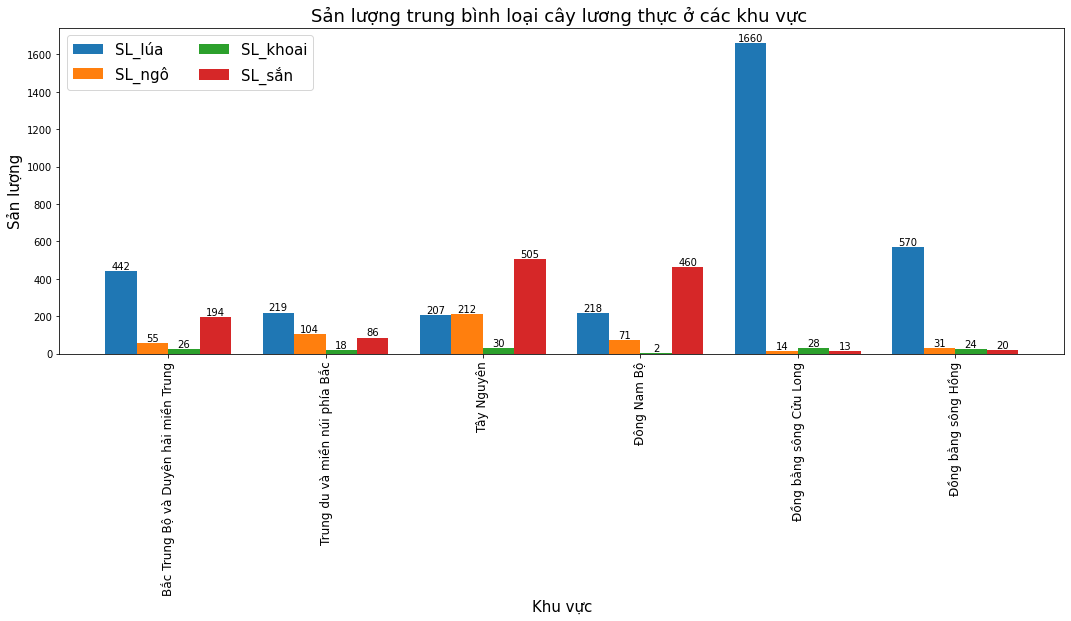

In [ ]:
fig, ax = plt.subplots(figsize = (18,6))
x = np.arange(sl_df.shape[0])
Q1_bar = ax.bar(x-0.3, sl_df['SL_lua'],width=0.2)
Q2_bar = ax.bar(x-0.1, sl_df['SL_ngo'],width=0.2)
Q3_bar = ax.bar(x+0.1, sl_df['SL_khoai'],width=0.2)
Q4_bar = ax.bar(x+0.3, sl_df['SL_san'],width=0.2)
plt.xticks(x, sl_df.index,size=12)
plt.title('Sản lượng trung bình loại cây lương thực ở các khu vực ',size = 18)
plt.xticks(rotation=90)
plt.xlabel('Khu vực', fontsize=15)
plt.ylabel('Sản lượng', fontsize= 15)
plt.legend((Q1_bar,Q2_bar,Q3_bar,Q4_bar), ('SL_lúa','SL_ngô','SL_khoai','SL_sắn'), loc = 'upper left', ncol =2, fontsize = 15)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,'%d' % int(height),
                ha='center', va='bottom')
autolabel(Q1_bar)
autolabel(Q2_bar)
autolabel(Q3_bar)
autolabel(Q4_bar)
plt.show()

**Nhận xét:**
- Lúa vẫn là cây lương thực chủ đạo của nước ta với hầu hết các vùng đều có sản lượng lúa rất cao. 
- Sản lượng lúa của đồng bằng sông cửu long chiếm đa phần của cả nước, tuy nhiên các sản lượng của các cây lương thực khác thì thấp. Điều này khá dễ hiểu vì đây vốn là vựa lúa chính của cả nước, địa hình và thời tiết thích hợp, người dân có kinh nghiệm canh tác lâu năm.
- Còn về ngô và khoai là các loại cây lương thực phụ nhưng vẫn chiếm vai trò khá quan trọng về đảm bảo lương thực cho một số khu vực nhất định.


### Với mức ý nghĩa 0.05, ước lượng khoảng tin cậy cho các biến DT_lua, SL_lua, DT_ngo, SL_ngo, DT_khoai, SL_khoai, DT_san, SL_san cho tất cả các khu vực

In [ ]:
statistics_df = df[~(df['Tỉnh, thành phố'] == 'CẢ NƯỚC')].reset_index(drop=True)

In [ ]:
def estimate_confident_interval(statistics_df,name_attr):
  stats_attr = st.norm.interval(0.95, loc = np.mean(statistics_df[name_attr]),scale = st.sem(statistics_df[name_attr]))
  stats_attr = [stats_attr[0], stats_attr[1]]
  data = {name_attr: stats_attr}
  return pd.DataFrame(data).T

In [ ]:
interval_df = pd.DataFrame()
agri = ['DT_lua','SL_lua', 'DT_ngo','SL_ngo','DT_khoai','SL_khoai','DT_san','SL_san']
for name_agri in agri:
  interval_df = pd.concat([interval_df, estimate_confident_interval(statistics_df,name_agri)])
interval_df.columns = ['Giới hạn dưới', 'Giới hạn trên']

In [ ]:
interval_df

,Giới hạn dưới,Giới hạn trên
DT_lua,1029.383985,1490.661015
SL_lua,5307.356946,7838.521388
DT_ngo,149.169701,197.471965
SL_ngo,614.391489,789.583511
DT_khoai,23.449110,31.844223
SL_khoai,209.244496,266.398837
DT_san,65.937100,87.401233
SL_san,1114.617429,1519.852571


## Top 5 những tỉnh thành có loại cây trồng nông nghiệp đứng đầu cả nước? xem phân bố những tình thành đó ở những khu vực nào?

In [ ]:
def trung_binh_thuoc_tinh(data_df, name_attr):
  mean_attr_df = data_df.groupby(['Tỉnh, thành phố','khu vực']).agg({name_attr:'mean'})
  mean_attr_df = mean_attr_df.reset_index('khu vực').sort_values(by=name_attr,ascending=True)
  return mean_attr_df

In [ ]:
def truc_quan_hoa_top_5(df,name_attr):
  ax = df.tail(5).reset_index().plot(kind='barh',x='Tỉnh, thành phố',y=name_attr,figsize=(15,8),label=f'Diện tích {name_attr[3:]}')
  plt.ylabel('Tỉnh, thành phố',size=12)
  for p in ax.patches:
      left, bottom, width, height = p.get_bbox().bounds  
      ax.annotate(format(round(float(width),3), ','), xy=(left+width/2, bottom+height/2), 
                  ha='center', va='center')

### Về diện tích và sản lượng lúa

In [ ]:
dt_lua = trung_binh_thuoc_tinh(data_df,'DT_lua')
dt_lua

,khu vực,DT_lua
"Tỉnh, thành phố",,
Đà Nẵng,Bắc Trung Bộ và Duyên hải miền Trung,7.39000
Đắk Nông,Tây Nguyên,12.28125
Bình Dương,Đông Nam Bộ,13.61000
Bình Phước,Đông Nam Bộ,13.89000
Bắc Kạn,Trung du và miền núi phía Bắc,21.91000
...,...,...
Sóc Trăng,Đồng bằng sông Cửu Long,347.23000
Long An,Đồng bằng sông Cửu Long,474.63500
Đồng Tháp,Đồng bằng sông Cửu Long,481.10500


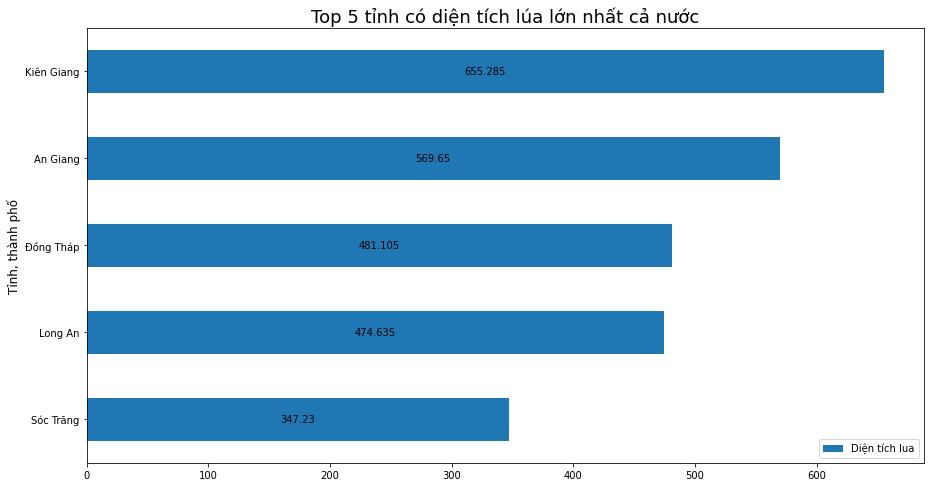

In [ ]:
truc_quan_hoa_top_5(dt_lua,'DT_lua')
plt.title('Top 5 tỉnh có diện tích lúa lớn nhất cả nước',size=18)
plt.show()

In [ ]:
region_df = dt_lua.tail(5)['khu vực'].value_counts(normalize = True) *100
region_df

Đồng bằng sông Cửu Long    100.0
Name: khu vực, dtype: float64

**Nhận xét:**
- Kiên Giang là tỉnh có diện tích lúa lớn nhất cả nước với diện tích khoảng 665.285 ha. Đứng phía sau bao gồm An Giang, Đồng Tháp, Long An, Sóc Trăng.
- Sự chênh lệch về diện tích lúa giữa top đầu và top cuối khá là lớn. Mức chênh lệch khoảng 450.000 ha và gấp ...
- Tất cả tốp 5 tỉnh thành có diện tích lúa lớn nhất cả nước đều nằm ở đồng bằng Sông Cửu Long. Điều đó phản ánh đúng đồng bằng sông Cửu long là khu vực có diện tích lúa lớn nhất cả nước (sau khi đã phân tích và so sánh ở biểu đồ tròn).

### Về diện tích và sản lượng ngô

In [ ]:
dt_ngo = trung_binh_thuoc_tinh(data_df,'DT_ngo')
dt_ngo

,khu vực,DT_ngo
"Tỉnh, thành phố",,
Kiên Giang,Đồng bằng sông Cửu Long,0.140
Bạc Liêu,Đồng bằng sông Cửu Long,0.230
Cà Mau,Đồng bằng sông Cửu Long,0.390
Đà Nẵng,Bắc Trung Bộ và Duyên hải miền Trung,0.600
Bình Dương,Đông Nam Bộ,0.695
...,...,...
Thanh Hoá,Bắc Trung Bộ và Duyên hải miền Trung,53.760
Nghệ An,Bắc Trung Bộ và Duyên hải miền Trung,53.850
Đồng Nai,Đông Nam Bộ,55.205


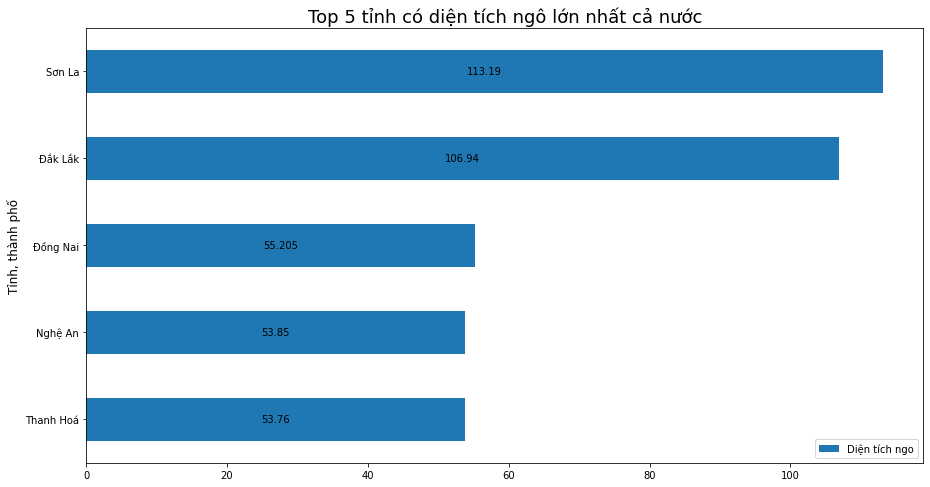

In [ ]:
truc_quan_hoa_top_5(dt_ngo,'DT_ngo')
plt.title('Top 5 tỉnh có diện tích ngô lớn nhất cả nước',size=18)
plt.show()

In [ ]:
region_df = dt_ngo.tail(5)['khu vực'].value_counts(normalize = True) *100
region_df

Bắc Trung Bộ và Duyên hải miền Trung    40.0
Trung du và miền núi phía Bắc           20.0
Tây Nguyên                              20.0
Đông Nam Bộ                             20.0
Name: khu vực, dtype: float64

**Nhận xét:**
- Sơn La là tỉnh có diện tích ngô lớn nhất cả nước với diện tích khoảng 11319 ha. Đứng phía sau bao gồm Đắk Lăk, Đồng Nai, Nghệ An, Thanh Hóa
- Có nhiều tỉnh thành không trồng ngô, chắc do điều điện khí hậu và vùng đất ở đó không thích hợp cho việc trồng ngô.
- Tất cả tốp 5 tỉnh thành có diện tích ngô lớn nhất cả nước nằm ở 3 khu vực khác nhau là Bắc Trung Bộ và duyên hải miền Trung, Đông Nam Bộ và Trung du và miền núi phía Bắc.

### Về diện tích và sản lượng khoai

In [ ]:
dt_khoai = trung_binh_thuoc_tinh(data_df,'DT_khoai')
dt_khoai

,khu vực,DT_khoai
"Tỉnh, thành phố",,
TP.Hồ Chí Minh,Đông Nam Bộ,0.066667
Long An,Đồng bằng sông Cửu Long,0.084211
Ninh Thuận,Bắc Trung Bộ và Duyên hải miền Trung,0.165000
Kon Tum,Tây Nguyên,0.170000
Khánh Hoà,Bắc Trung Bộ và Duyên hải miền Trung,0.200000
...,...,...
Vĩnh Long,Đồng bằng sông Cửu Long,7.915000
Bắc Giang,Trung du và miền núi phía Bắc,9.195000
Hà Tĩnh,Bắc Trung Bộ và Duyên hải miền Trung,10.450000


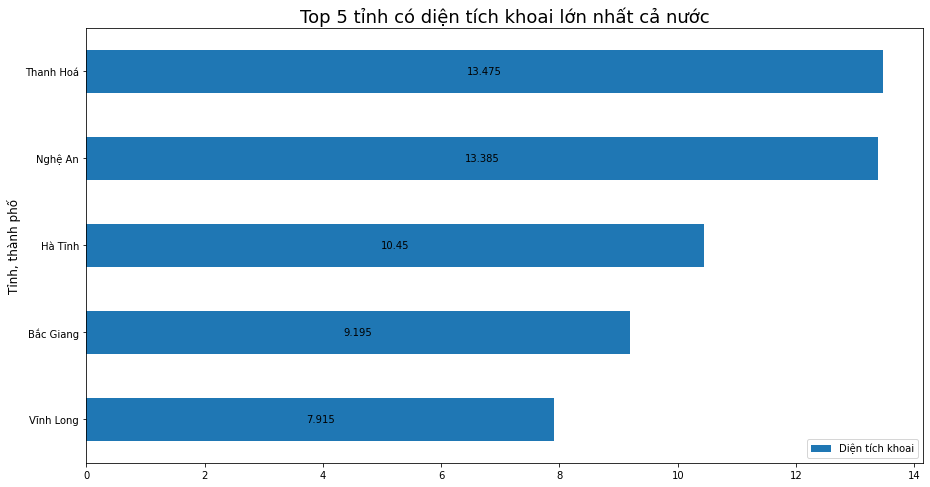

In [ ]:
truc_quan_hoa_top_5(dt_khoai,'DT_khoai')
plt.title('Top 5 tỉnh có diện tích khoai lớn nhất cả nước',size=18)
plt.show()

In [ ]:
region_df = dt_khoai.tail(5)['khu vực'].value_counts(normalize = True) *100
region_df

Bắc Trung Bộ và Duyên hải miền Trung    60.0
Trung du và miền núi phía Bắc           20.0
Đồng bằng sông Cửu Long                 20.0
Name: khu vực, dtype: float64

**Nhận xét:**
- Thanh Hóa, Nghệ An là những tỉnh có diện tích trồng khoai lớn nhất cả nước với diện tích khoảng hơn 13.000 ha.
- Có nhiều tỉnh thành không trồng khoai được như Thành phố Hồ Chí Minh, Long An, Ninh Thuận,... chắc do điều điện khí hậu và vùng đất ở đó không thích hợp cho việc trồng khoai.
- Tất cả tốp 5 tỉnh thành có diện tích trồng khoai lớn nhất cả nước đa phần nằm ở khu vực Bắc Trung Bộ và duyên hải miền Trung. Điều đó phản ảnh đúng khu vực này chiếm diện tích trồng khoai lớn so với các khu vực khác.

### Về diện tích và sản lượng sắn

In [ ]:
dt_san = trung_binh_thuoc_tinh(data_df,'DT_san')
dt_san = dt_san.dropna().reset_index()

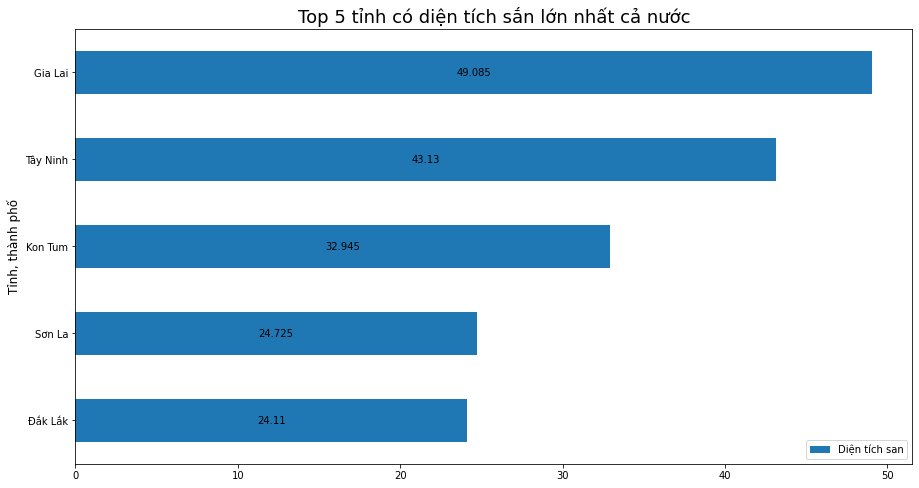

In [ ]:
truc_quan_hoa_top_5(dt_san,'DT_san')
plt.title('Top 5 tỉnh có diện tích sắn lớn nhất cả nước',size=18)
plt.show()

In [ ]:
region_df = dt_san.tail(5)['khu vực'].value_counts(normalize = True) *100
region_df

Tây Nguyên                       60.0
Trung du và miền núi phía Bắc    20.0
Đông Nam Bộ                      20.0
Name: khu vực, dtype: float64

**Nhận xét:**
- Gia Lai là tỉnh có diện tích trồng sắn lớn nhất cả nước với diện tích khoảng 49.085 ha. Đứng phía sau bao gồm Tây Ninh, Kon Tum, Sơn La, Đắc Lắc.
- Tất cả tốp 5 tỉnh thành có diện tích ngô lớn nhất cả nước nằm ở 3 khu vực khác nhau là Bắc Trung Bộ và duyên hải miền Trung, Đông Nam Bộ và Trung du và miền núi phía Bắc.
- Nhận tháy, các tỉnh trồng ngô thì đa phần cũng đều trồng sắn.

# Phân tích chăn nuôi

### So sánh số lượng trâu, bò, heo qua các năm

In [ ]:
ten_giasuc = ['SL_trau','SL_bo','SL_heo']
gia_suc_df = df[['Năm','Tỉnh, thành phố', 'SL_trau','SL_bo','SL_heo']].set_index('Năm')
gia_suc_df['SL_gia_suc'] = gia_suc_df.sum(axis=1)

In [ ]:
gia_suc_ca_nuoc = gia_suc_df[gia_suc_df['Tỉnh, thành phố'] == 'CẢ NƯỚC']
gia_suc_ca_nuoc

,"Tỉnh, thành phố",SL_trau,SL_bo,SL_heo,SL_gia_suc
Năm,,,,,
2000,CẢ NƯỚC,2897.2,4127.9,20193.8,27218.9
2001,CẢ NƯỚC,2807.9,3899.7,21800.1,28507.7
2002,CẢ NƯỚC,2814.5,4062.9,23169.5,30046.9
2003,CẢ NƯỚC,2834.9,4394.4,24884.6,32113.9
2004,CẢ NƯỚC,2869.8,4907.7,26143.7,33921.2
2005,CẢ NƯỚC,2922.2,5540.7,27435.0,35897.9
2006,CẢ NƯỚC,2921.1,6510.8,26855.3,36287.2
2007,CẢ NƯỚC,2996.4,6724.7,26560.7,36281.8
2008,CẢ NƯỚC,2897.7,6337.7,26701.6,35937.0


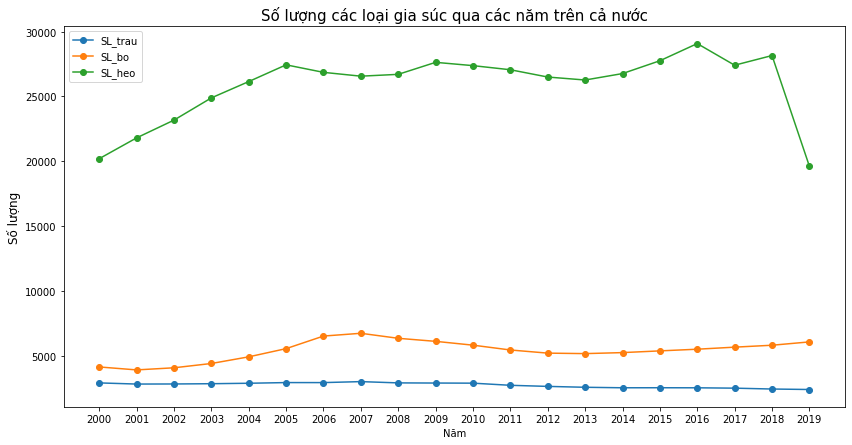

In [ ]:
gia_suc_ca_nuoc[ten_giasuc].plot.line(marker ='o',figsize=(14,7), legend=True)
plt.xticks(range(2000,2020))
plt.ylabel('Số lượng',size=12)
plt.title('Số lượng các loại gia súc qua các năm trên cả nước',size=15)
plt.show()

**Nhận xét:**
1. Thống kê mô tả
 - Số lượng trâu của nước ta nhìn chung đều giảm qua các năm nhưng giảm không đáng kể qua các năm, cao nhất năm 2000 với sản lượng là 2900 nghìn con, thấp nhất năm 2019 với số lượng là 2390 nghìn con.
 - Số lượng bò của nước ta có sự tăng giảm không đồng đều qua các năm, cao nhất năm 2007 với sản lượng là 6725 nghìn con, thấp nhất năm 2001 với số lượng là 3900 nghìn con.
 - Số lượng heo của nước ta có sự tăng giảm không đồng đều qua các năm, cao nhất năm 2016 với số lượng là 29000 nghìn con, thấp nhất năm 2001 với số lượng là 19615 con.

2. Phân tích dữ liệu đơn giản 

 - Cụ thể, số lượng heo trong giai đoạn từ 2000 -2005 tăng một cách rất nhanh chóng từ mức 20000 nghìn con lên 28000 nghìn con, nhưng trong giai đoạn từ 20005-2016 thì lại có sự tăng giảm không đồng đều qua các năm, và từ giai đoạn 2016 trở đi, đã giảm một cách rất nhanh chóng và chạm mức thấp nhất vào năm 2019 với số lượng 19615 nghìn con.
 - Số lượng bò thì ngàng càng tăng trong khoảng từ giai đoạn 2012 trở đi, điều đó trái ngược lại với sản lượng trâu. Nhóm phỏng đoán rằng, do việc cơ giới hóa trong nông nghiệp khiến cho số lượng trâu nuôi giảm xuống, và người tiêu dùng chuộng sử dụng thịt bò hơn thịt trâu.

## Biến động số lượng chăn nuôi qua các năm

- Để có cái nhìn khái quát hơn, thì nhóm không đi chi tiết vào từng loại gia súc mà tính tổng toàn bộ sản lượng gia súc.

In [ ]:
gia_cam_df = df[['Năm','Tỉnh, thành phố','SL_gia_cam']]
chan_nuoi_df = gia_suc_df.merge(gia_cam_df,how='left',right_on=['Năm','Tỉnh, thành phố'], left_on=['Năm','Tỉnh, thành phố'])
name_chan_nuoi = ['SL_gia_suc','SL_gia_cam']
chan_nuoi_df['Tổng số lượng'] = chan_nuoi_df[name_chan_nuoi].sum(axis=1)

In [ ]:
chan_nuoi_df

,Năm,"Tỉnh, thành phố",SL_trau,SL_bo,SL_heo,SL_gia_suc,SL_gia_cam,Tổng số lượng
0,2000,CẢ NƯỚC,2897.2,4127.9,20193.8,27218.9,196188.0,223406.9
1,2000,Đồng bằng sông Hồng,278.1,502.9,5687.7,6468.7,54742.0,61210.7
2,2000,Trung du và miền núi phía Bắc,1562.0,651.1,4088.1,6301.2,34514.0,40815.2
3,2000,Bắc Trung Bộ và Duyên hải miền Trung,823.5,2023.2,4953.4,7800.1,40385.0,48185.1
4,2000,Tây Nguyên,68.4,524.9,1122.8,1716.1,6102.0,7818.1
...,...,...,...,...,...,...,...,...
135,2019,Trung du và miền núi phía Bắc,1331.6,1081.6,5108.7,7521.9,97903.0,105424.9
136,2019,Bắc Trung Bộ và Duyên hải miền Trung,774.3,2380.3,3883.0,7037.6,100462.0,107499.6
137,2019,Tây Nguyên,96.4,831.5,1544.3,2472.2,24759.0,27231.2
138,2019,Đông Nam Bộ,36.9,420.5,3214.7,3672.1,55309.0,58981.1


In [ ]:
channuoi_canuoc_df = chan_nuoi_df[chan_nuoi_df['Tỉnh, thành phố'] == 'CẢ NƯỚC'].set_index('Năm')

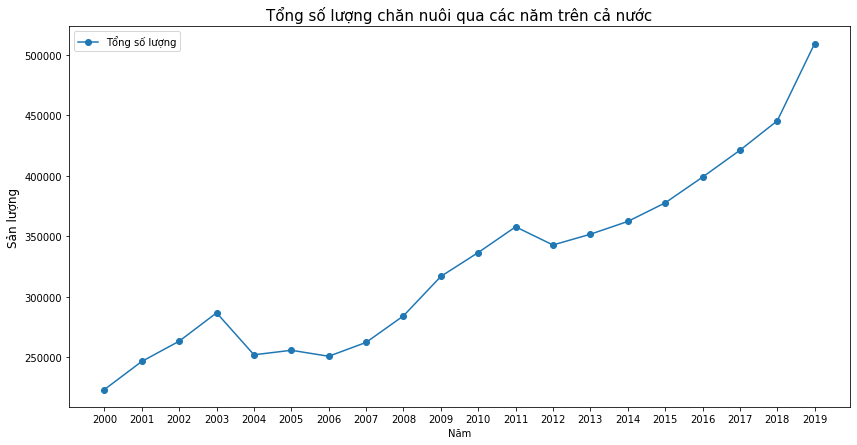

In [ ]:
channuoi_canuoc_df['Tổng số lượng'].plot.line(marker ='o',figsize=(14,7), legend=True)
plt.xticks(range(2000,2020))
plt.ylabel('Sản lượng',size=12)
plt.title('Tổng số lượng chăn nuôi qua các năm trên cả nước',size=15)
plt.show()

**Nhận xét:**
- Tổng sản lượng chân nuôi qua các năm đa phần đều có sự gia tăng, cao nhất năm 2019 với hơn 500000 con và thấp nhất vào năm 2000 với khoảng 230000 con.
- Đặc biệt, trong giai đoạn từ năm 2012 trở đi, tổng sản lượng chân nuôi đã tăng một cách rất đột biến, từ mức 325000 con đã tăng lên hơn 500000 con, tôc độ tăng trưởng hơn 50%. 

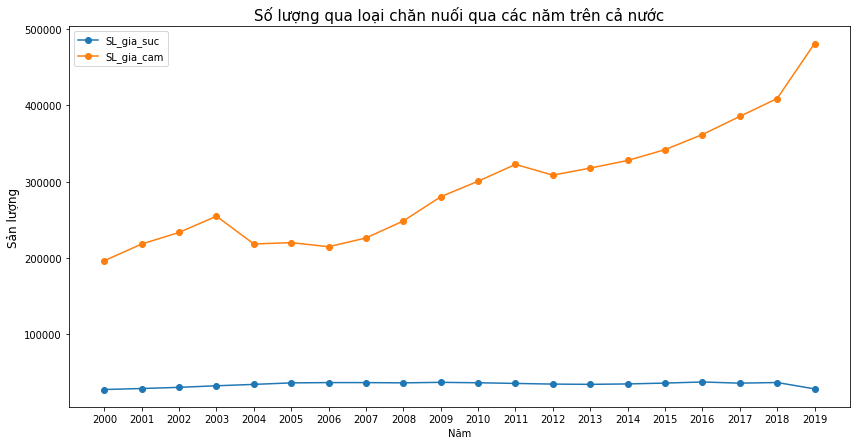

In [ ]:
channuoi_canuoc_df[name_chan_nuoi].plot.line(marker ='o',figsize=(14,7), legend=True)
plt.xticks(range(2000,2020))
plt.ylabel('Sản lượng',size=12)
plt.title('Số lượng qua loại chăn nuối qua các năm trên cả nước',size=15)
plt.show()

**Nhận xét:**
- Sản lượng gia cầm qua các năm có mức biến động tương đương với tổng sản lượng chăn nuôi qua các năm.
- Sản lượng gia cầm vẫn là sản phẩm chăn nuôi chủ yếu của người dân.

## Số lượng chăn nuôi tại mỗi khu vực 

In [ ]:
khu_vuc_chan_nuoi = chan_nuoi_df[~(chan_nuoi_df['Tỉnh, thành phố']=='CẢ NƯỚC')]
khu_vuc_chan_nuoi = khu_vuc_chan_nuoi.groupby(['Tỉnh, thành phố'])[name_chan_nuoi].mean()
khu_vuc_chan_nuoi = pd.concat([khu_vuc_chan_nuoi,sl_tinh],axis=1)
khu_vuc_chan_nuoi

,SL_gia_suc,SL_gia_cam,"Số lượng tỉnh, thành phố"
Bắc Trung Bộ và Duyên hải miền Trung,8647.520,62657.40,14
Trung du và miền núi phía Bắc,8310.180,60550.45,14
Tây Nguyên,2301.495,12681.10,5
Đông Nam Bộ,2957.750,25011.45,6
Đồng bằng sông Cửu Long,4107.385,54345.10,13
Đồng bằng sông Hồng,7657.525,78024.50,11


In [ ]:
chan_nuoi_trung_binh =  khu_vuc_chan_nuoi['SL_gia_suc'] / khu_vuc_chan_nuoi['Số lượng tỉnh, thành phố']
chan_nuoi_trung_binh = chan_nuoi_trung_binh.to_frame().rename(columns={0:'SL_gia_suc_trung_binh'})
chan_nuoi_trung_binh['SL_gia_cam_trung_binh'] = khu_vuc_chan_nuoi['SL_gia_cam'] / khu_vuc_chan_nuoi['Số lượng tỉnh, thành phố']
chan_nuoi_trung_binh

,SL_gia_suc_trung_binh,SL_gia_cam_trung_binh
Bắc Trung Bộ và Duyên hải miền Trung,617.680000,4475.528571
Trung du và miền núi phía Bắc,593.584286,4325.032143
Tây Nguyên,460.299000,2536.220000
Đông Nam Bộ,492.958333,4168.575000
Đồng bằng sông Cửu Long,315.952692,4180.392308
Đồng bằng sông Hồng,696.138636,7093.136364


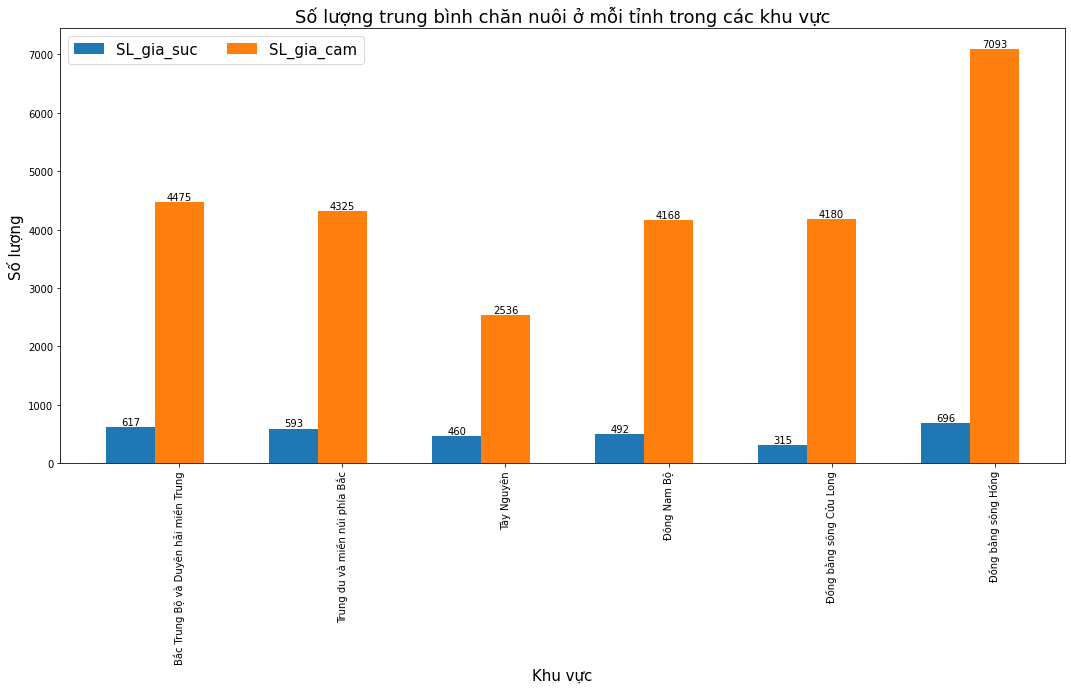

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
x = np.arange(chan_nuoi_trung_binh.shape[0])
Q1_bar = ax.bar(x-0.3, chan_nuoi_trung_binh['SL_gia_suc_trung_binh'],width=0.3)
Q2_bar = ax.bar(x, chan_nuoi_trung_binh['SL_gia_cam_trung_binh'],width=0.3)
plt.xticks(x, chan_nuoi_trung_binh.index,size=10)
plt.title('Số lượng trung bình chăn nuôi ở mỗi tỉnh trong các khu vực',size = 18)
plt.xticks(rotation=90)
plt.xlabel('Khu vực', fontsize=15)
plt.ylabel('Số lượng', fontsize= 15)
plt.legend((Q1_bar,Q2_bar), ('SL_gia_suc','SL_gia_cam'), loc = 'upper left', ncol =2, fontsize = 15)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,'%d' % int(height),
                ha='center', va='bottom')
autolabel(Q1_bar)
autolabel(Q2_bar)
plt.show()

**Nhận xét:**
- Biểu đồ thể hiện tình hình chăn nuôi một số loại vật nuôi ở các khu vực trong nước. Thì mỗi vùng đều có chăn nuôi các loại vật nuôi đa dạng với số lượng ít nhiều khác nhau. Do đó đảm bảo được việc tự cung cấp được các loại thịt ở trong từng khu vực.

## Top 5 những tỉnh thành có sản lượng chăn nuôi đứng đầu cả nước? xem phân bố những tình thành đó ở những khu vực nào?

### Về sản lượng gia cầm

In [ ]:
sl_gia_cam = trung_binh_thuoc_tinh(data_df,'SL_gia_cam')
sl_gia_cam

,khu vực,SL_gia_cam
"Tỉnh, thành phố",,
Đà Nẵng,Bắc Trung Bộ và Duyên hải miền Trung,516.9500
Kon Tum,Tây Nguyên,716.8500
TP.Hồ Chí Minh,Đông Nam Bộ,839.4500
Lai Châu,Trung du và miền núi phía Bắc,938.0625
Ninh Thuận,Bắc Trung Bộ và Duyên hải miền Trung,1088.3500
...,...,...
Đồng Nai,Đông Nam Bộ,11010.2000
Bắc Giang,Trung du và miền núi phía Bắc,12708.9000
Hà Nội,Đồng bằng sông Hồng,14091.6500


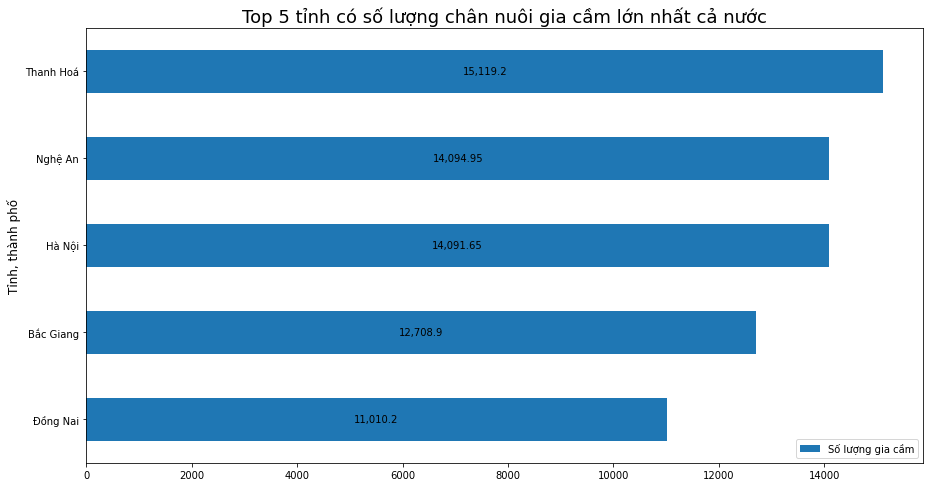

In [ ]:
truc_quan_hoa_top_5(sl_gia_cam,'SL_gia_cam')
plt.title('Top 5 tỉnh có số lượng chân nuôi gia cầm lớn nhất cả nước',size=18)
plt.legend(['Số lượng gia cầm'])
plt.show()

In [ ]:
region_df = sl_gia_cam.tail(5)['khu vực'].value_counts(normalize = True) *100
region_df

Bắc Trung Bộ và Duyên hải miền Trung    40.0
Đồng bằng sông Hồng                     20.0
Trung du và miền núi phía Bắc           20.0
Đông Nam Bộ                             20.0
Name: khu vực, dtype: float64

**Nhận xét:**
- Thanh Hóa là tỉnh có số lượng gia cầm lớn nhất cả nước với số lượng khoảng 15 triệu con. Đứng phía sau bao gồm Nghệ An, Hà Nội, Bắc Giang, Đồng Nai.
- Tất cả tốp 5 tỉnh thành có số lượng gia cầm lớn nhất cả nước nằm ở các khu vực khác nhau. Điều đó cho thấy, số lượng gia cầm được phân bố đồng đều ở các tỉnh thành và không có sự chênh chệch đáng kể giữa các khu vực.

### Về sản lượng gia súc

In [ ]:
gia_suc_tinh_df = data_df[['Tỉnh, thành phố','khu vực','SL_trau','SL_bo','SL_heo']]
gia_suc_tinh_df['SL_gia_suc'] = gia_suc_tinh_df.sum(axis=1)
sl_gia_suc = trung_binh_thuoc_tinh(gia_suc_tinh_df,'SL_gia_suc')
sl_gia_suc

,khu vực,SL_gia_suc
"Tỉnh, thành phố",,
Đà Nẵng,Bắc Trung Bộ và Duyên hải miền Trung,94.075
Hậu Giang,Đồng bằng sông Cửu Long,121.375
Đắk Nông,Tây Nguyên,126.395
Cần Thơ,Đồng bằng sông Cửu Long,162.325
Ninh Thuận,Bắc Trung Bộ và Duyên hải miền Trung,174.915
...,...,...
Hà Nội,Đồng bằng sông Hồng,1170.780
Bắc Giang,Trung du và miền núi phía Bắc,1228.100
Đồng Nai,Đông Nam Bộ,1291.355


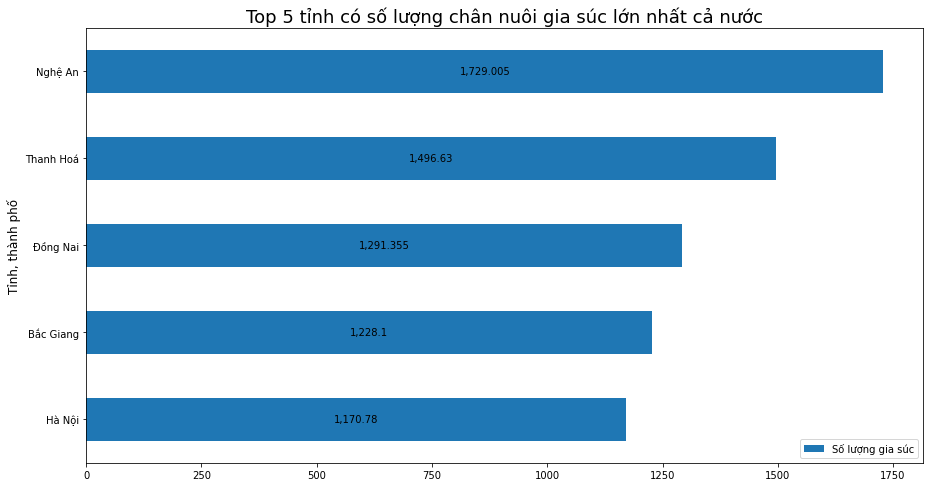

In [ ]:
truc_quan_hoa_top_5(sl_gia_suc,'SL_gia_suc')
plt.title('Top 5 tỉnh có số lượng chân nuôi gia súc lớn nhất cả nước',size=18)
plt.legend(['Số lượng gia súc'])
plt.show()

In [ ]:
region_df = sl_gia_suc.tail(5)['khu vực'].value_counts(normalize = True) *100
region_df

Bắc Trung Bộ và Duyên hải miền Trung    40.0
Trung du và miền núi phía Bắc           20.0
Đồng bằng sông Hồng                     20.0
Đông Nam Bộ                             20.0
Name: khu vực, dtype: float64

**Nhận xét:**
- Nghệ An là tỉnh có số lượng gia súc lớn nhất cả nước với số lượng khoảng 1729000 con. Đứng phía sau bao gồm Thanh Hóa, Đồng Nai, Bắc Giang, Hà Nội
- Tất cả tốp 5 tỉnh thành có số lượng gia súc lớn nhất cả nước nằm ở các khu vực khác nhau. Điều đó cho thấy, số lượng gia súc được phân bố đồng đều ở các tỉnh thành và không có sự chênh chệch đáng kể giữa các khu vực.

## Biểu diễn mối quan hệ giữa sản lượng gia súc với sản lượng gia cầm

In [ ]:
tinh_channuoi = data_df[['Năm','Tỉnh, thành phố','SL_heo','SL_trau','SL_bo']]
tinh_channuoi['SL_gia_suc'] = tinh_channuoi.sum(axis=1)
tinh_channuoi['SL_gia_cam'] = data_df['SL_gia_cam']
tinh_channuoi

,Năm,"Tỉnh, thành phố",SL_heo,SL_trau,SL_bo,SL_gia_suc,SL_gia_cam
0,2000,Hà Nội,307.9,15.4,36.6,2359.9,2938.0
1,2000,Vĩnh Phúc,461.8,37.2,99.4,2598.4,5018.0
2,2000,Bắc Ninh,419.7,17.1,42.6,2479.4,3038.0
3,2000,Quảng Ninh,289.2,64.4,14.6,2368.2,2165.0
4,2000,Hải Dương,613.5,35.6,37.5,2686.6,7003.0
...,...,...,...,...,...,...,...
1255,2019,Cần Thơ,96.4,0.1,4.2,2119.7,2003.0
1256,2019,Hậu Giang,86.1,1.5,3.6,2110.2,4429.0
1257,2019,Sóc Trăng,99.8,2.4,38.8,2160.0,6607.0
1258,2019,Bạc Liêu,97.7,1.2,2.5,2120.4,2942.0


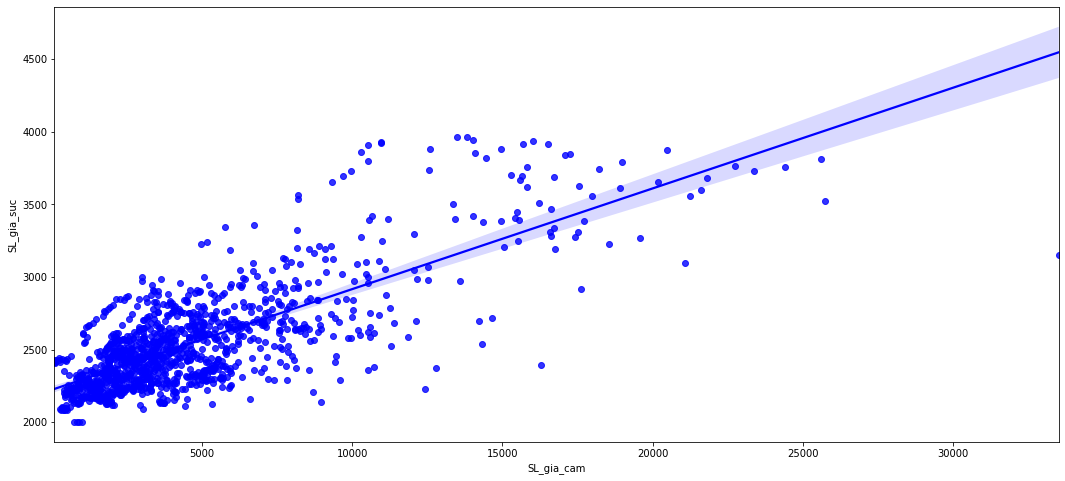

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18,8)
width = 0.5
sns.regplot(x=tinh_channuoi['SL_gia_cam'],y=tinh_channuoi['SL_gia_suc'], color = 'blue', ax = ax)
plt.show()

In [ ]:
channuoi_df = tinh_channuoi[['SL_gia_suc','SL_gia_cam']].dropna()
Y = channuoi_df['SL_gia_suc']
X = channuoi_df['SL_gia_cam']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             SL_gia_suc   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1755.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          4.08e-240
Time:                        14:27:06   Log-Likelihood:                -8551.1
No. Observations:                1248   AIC:                         1.711e+04
Df Residuals:                    1246   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2223.1530     10.044    221.352      0.0

**Kết luận:**

- Biến SL_gia_cam có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp tốt với dữ liệu quan sát về mặt thống kê.
- Biến SL_gia_suc có thể giải thích được 58.5% sự thay đổi của biến SL_gia_cam.
- Phương trình hồi quy:

          SL_giasuc = 2223.1530 + 0.0693 × SL_gia_cam
      
**Theo kết quả của mô hình:**
- Khi số lượng gia súc tăng 10 con thì số lượngn gia càm tăng 145 con.

## Với mức ý nghĩa 0.05, ước lượng khoảng tin cậy cho các biến SL_gia_suc, SL_gia_cam

In [ ]:
interval_channuoi_df = pd.DataFrame()
chan_nuoi = ['SL_gia_suc','SL_gia_cam']
for name_chan_nuoi in chan_nuoi:
  interval_channuoi_df = pd.concat([interval_channuoi_df, estimate_confident_interval(channuoi_df,name_chan_nuoi)])
interval_channuoi_df.columns = ['Giới hạn dưới', 'Giới hạn trên']

In [ ]:
interval_channuoi_df

,Giới hạn dưới,Giới hạn trên
SL_gia_suc,2524.857254,2564.278163
SL_gia_cam,4418.326621,4853.139404


# Phân tích rừng

## Diện tích rừng trên cả nước qua các năm biến động như thế nào?

In [ ]:
rung_df = df[['Năm','Tỉnh, thành phố', 'DT_rung']]
canuoc_rung_df = rung_df[rung_df['Tỉnh, thành phố'] == 'CẢ NƯỚC'].set_index('Năm')

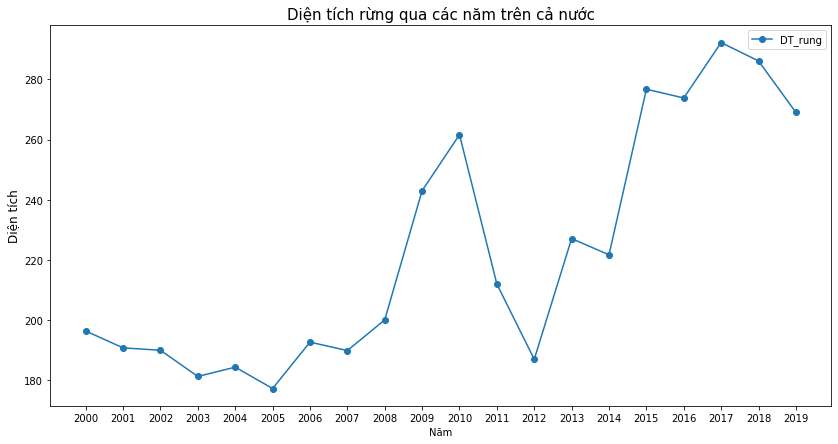

In [ ]:
canuoc_rung_df['DT_rung'].plot.line(marker ='o',figsize=(14,7), legend=True)
plt.xticks(range(2000,2020))
plt.ylabel('Diện tích',size=12)
plt.title('Diện tích rừng qua các năm trên cả nước',size=15)
plt.show()

**Nhận xét**:
Nhìn chung diện tích rừng biến khá biến động trong khoảng thời gian này.
- Trong khoảng thời gian ban đầu đến 2005 diện tích rừng giảm dần đều, đến năm 2006 thì tăng trở lại và liên tục, mạnh nhất trong khoảng từ năm 2008-2010.


- Tuy nhiên đến năm 2011 và 2012 lại giảm mạnh về lại mốc khoảng của năm 2007.

- Kể từ năm 2012 thì nhìn chung tăng mạnh đến năm 2017 và giảm nhẹ sau đó. Để lý giải điều này ta sẽ thử phân tích diện tích rừng ở các khu vực qua các năm

## Diện tích rừng ở các khu vực khác nhau qua các năm

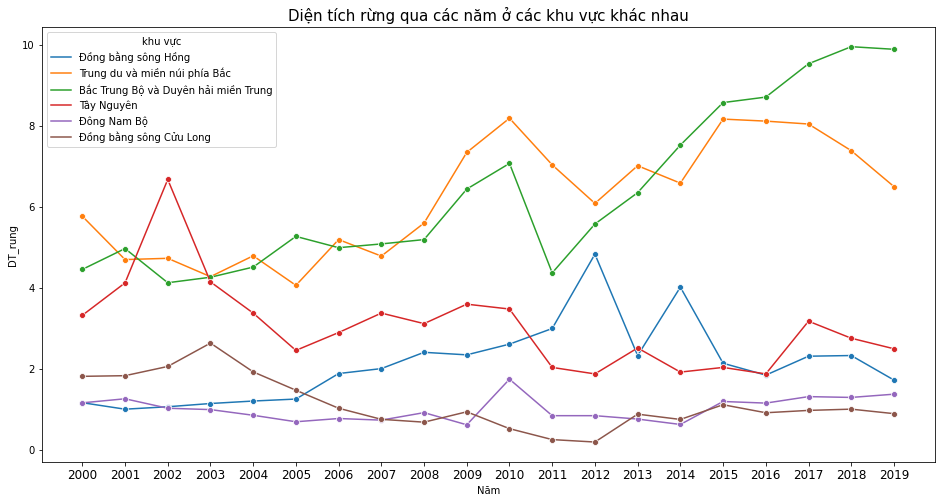

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=data_df['Năm'], y=data_df['DT_rung'], hue=data_df['khu vực'], ax=ax,ci=None,marker='o')
plt.xticks(range(data_df['Năm'].min(),data_df['Năm'].max()+1),size=12)
plt.title('Diện tích rừng qua các năm ở các khu vực khác nhau',size=15)
fig.show()

## So sánh diện tích rừng ở từng khu vực qua các năm

In [ ]:
dt_rung_df = df[~(df['Tỉnh, thành phố']=='CẢ NƯỚC')][['Năm','Tỉnh, thành phố','DT_rung']].set_index(['Năm','Tỉnh, thành phố'])
khu_vuc_rung = dt_rung_df.unstack(level=0).index.tolist()
dt_rung_df = dt_rung_df.unstack(level=-1)
data_perc = dt_rung_df.divide(dt_rung_df.sum(axis=1), axis=0)*100
data_perc.columns =khu_vuc_rung

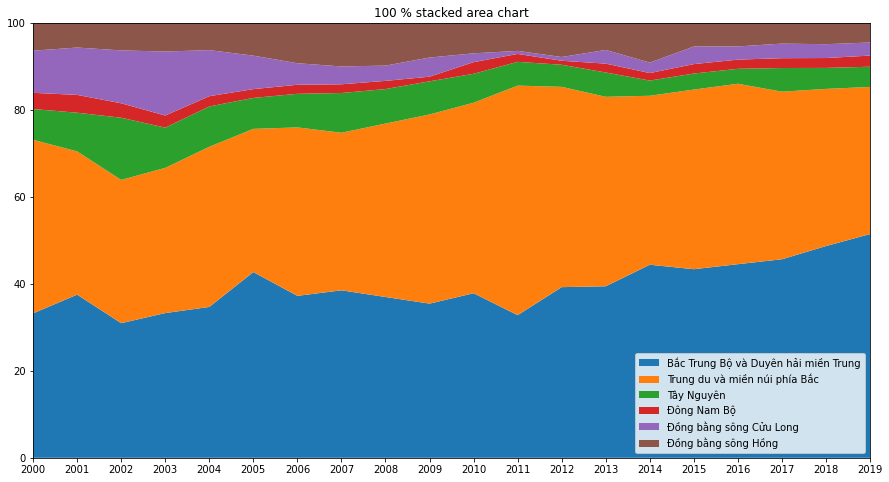

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
plt.stackplot(data_perc.index,  data_perc["Bắc Trung Bộ và Duyên hải miền Trung"],data_perc["Trung du và miền núi phía Bắc"],\
              data_perc['Tây Nguyên'],data_perc["Đông Nam Bộ"],\
              data_perc['Đồng bằng sông Cửu Long'],data_perc["Đồng bằng sông Hồng"], labels = khu_vuc_rung)
plt.legend(loc='lower right')
plt.xticks(range(2000,2020))
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

Bắc trung bộ cộng với duyên hải miền trung, và trung du và miền núi phía bắc là những khu vực chiếm phần lớn diện tích của cả nước trong xuyên suốt khoảng thời gian từ 2000 -2019. Đây cũng là điều dễ hiểu do địa hình những vùng này chủ yếu là đồi núi và rừng rậm. Tây nguyên và đồng bằng sông cửu long có diện tích rừng giảm mạnh qua các năm. Đây có thể là do vấn nạn chặt phá rừng làm nương rẫy cũng như khai thác rừng quá mức tại 2 khu vực này.

# Phân tích Ngư nghiệp

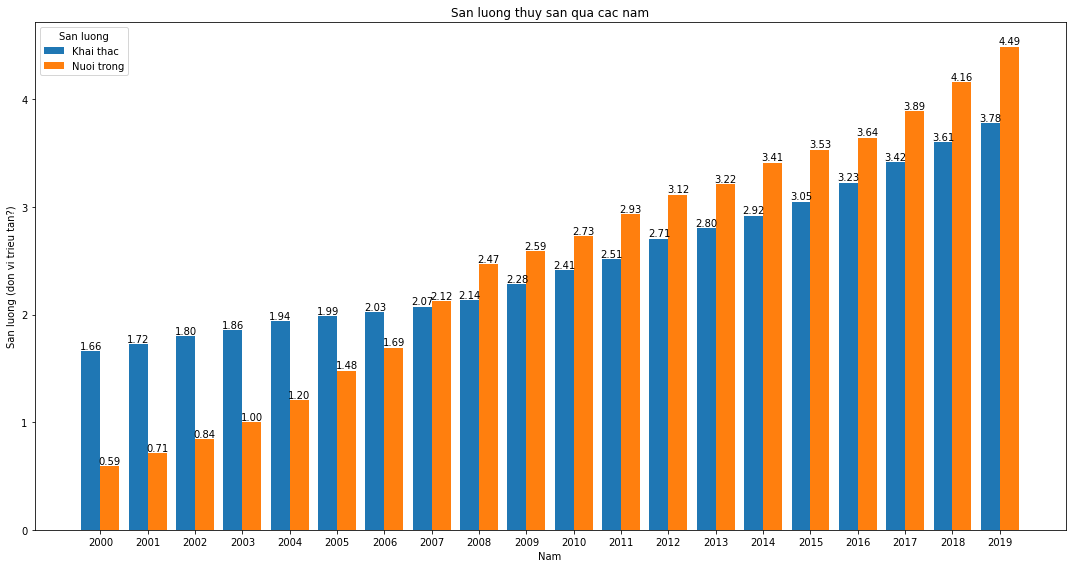

In [ ]:
labels = ca_nuoc_df.index
x = np.arange(len(labels))

width = 0.4

fig, ax = plt.subplots(figsize=(15, 8))

rects1 = ax.bar(x - width/2, ca_nuoc_df['SL_thuysan_khaithac'] / 1000000, width, label='Khai thac')
rects2 = ax.bar(x + width/2, ca_nuoc_df['SL_thuysan_nuoitrong'] / 1000000, width, label='Nuoi trong')

ax.set_ylabel('San luong (don vi trieu tan?)')
ax.set_title('San luong thuy san qua cac nam')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='San luong', loc='upper left')
ax.set_xlabel('Nam')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,'%.2f' % height,
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

**Nhận xét:**
1. Thống kê mô tả
 - Sản lượng thủy sản khai thác của nước ta nhìn chung tăng dần đều qua các năm, thấp nhất năm 2000 với sản lượng là 1.66 triệu tấn, tăng qua các năm lên đến 127% vào năm 2019 (với sản lượng 3.78 triệu tấn).
 - Sản lượng thủy sản nuôi trồng cũng đều tăng qua các năm, từ 0.59 triệu tấn năm 2000, chỉ trong vòng 20 năm đã tăng lên tới 4.49 triệu tấn năm 2019, gấp hơn 7.6 lần. 

2. Phân tích dữ liệu đơn giản 
 - Mặc dù sản lượng thủy sản nuôi trồng và chăn nuôi đều tăng nhưng tỉ lệ tăng thì lại không giống nhau. 
 - So với sản lượng nuôi trồng, sản lượng khai thác tăng đều và chậm qua các năm, trong khi sản lượng nuôi trồng lại tăng rất nhanh trong giai đoạn từ năm 2000 cho tới 2008.
 - Cụ thể, nửa giai đoạn đầu sản lượng nuôi trồng luôn thấp hơn sản lượng khai thác, tuy nhiên đến năm 2007 đã chính thức cán mốc và vượt qua và vượt trội hơn kể từ đó trở đi.
 - Điều này chứng tỏ nhà nước ta có các chính sách khuyến khích, hỗ trợ ngư dân nuôi trồng thủy sản. Ngược lại thì việc khai thác, đánh bắt xa bờ vẫn còn nhiều khó khăn nên tỉ lệ không cao.

## Biểu diễn mối quan hệ giữa tỉ lệ sản lượng thủy sản nuôi trồng so với khai thác qua các năm

In [ ]:
X = sm.add_constant(ca_nuoc_df.index - 2000)
y = (ca_nuoc_df['SL_thuysan_nuoitrong'] / ca_nuoc_df['SL_thuysan_khaithac']).values
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())
predict = lambda x: res.predict(np.concatenate((np.ones((x.shape[0])).reshape(-1, 1), (x-2000).reshape(-1, 1)), axis = 1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     57.53
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           5.19e-07
Time:                        14:27:08   Log-Likelihood:                 10.590
No. Observations:                  20   AIC:                            -17.18
Df Residuals:                      18   BIC:                            -15.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5214      0.065      8.055      0.0

**Kết luận:**

- Biến X có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp tốt với dữ liệu quan sát về mặt thống kê.
- Biến y có thể giải thích được 76.2% sự thay đổi của biến X.
- Phương trình hồi quy:

    `Tỉ lệ sản lượng thủy sản nuôi trồng so với khai thác = 0.5214 + 0.0442 × Năm`
      
**Theo kết quả của mô hình:**
-  Tỉ lệ tăng 0.045 khi cứ qua mỗi năm.

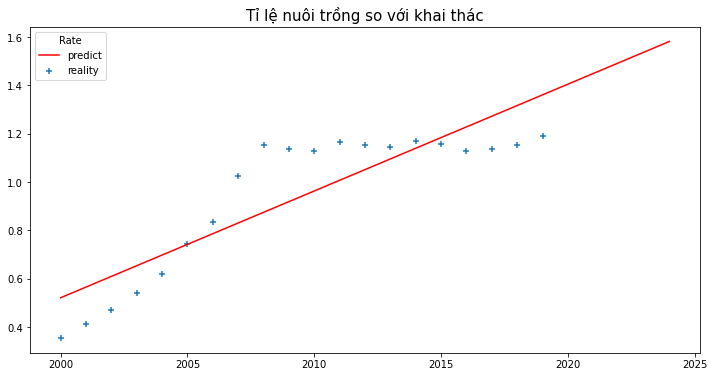

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
x = np.arange(2000, 2025, 1)
plt.plot(x, predict(x), c='r', label='predict')
plt.scatter(ca_nuoc_df.index, y, label='reality', marker='+');
plt.legend(title='Rate')
plt.title('Tỉ lệ nuôi trồng so với khai thác',size=15);